## Part 1: MNIST handwritten digits

In [56]:
# Imports and setup. 

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.svm import SVC


import matplotlib.pyplot as plt
plt.style.use('ggplot')

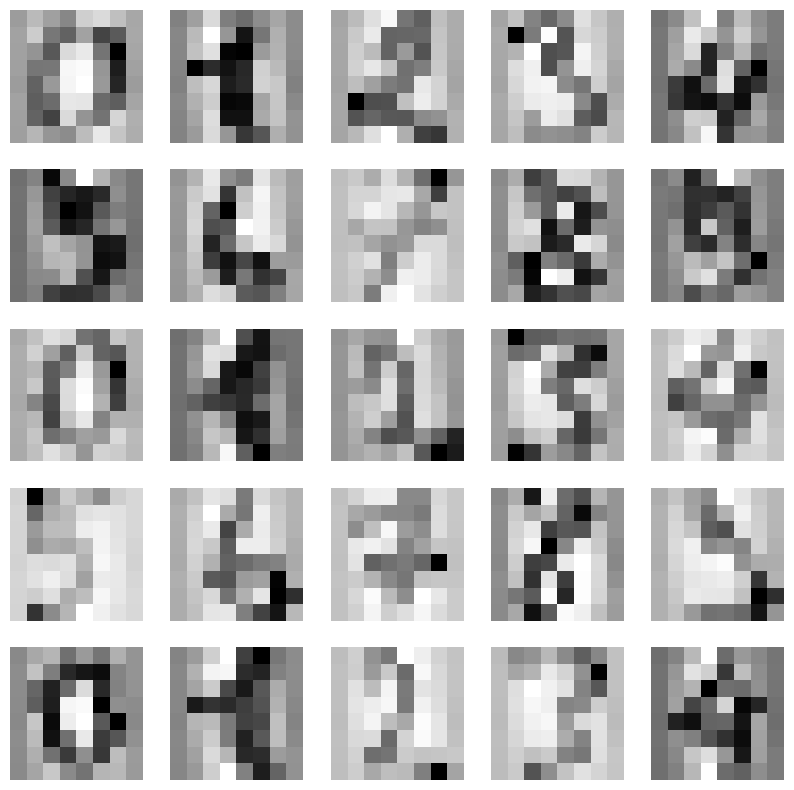

In [57]:
#Scale images...

digits = load_digits()
x = scale( digits.data )
y = digits.target

# Display the first 25 images

plt.figure( figsize=(10, 10) )
 
for i in np.arange( 25 ):
    # place each image in its own subplot within the grid
    plt.subplot( 5, 5, i+1 )
    # Show images: reshapes part x array corresponding to the i-th image from array of 64 elements back into a 8x8 array (since each image is 8x8 pixels)
    plt.imshow( np.reshape( x[i,:], (8,8) ), cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()


### SVM


In [58]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.8 )

#Use SVM with a rbf kernel and the cost parameter C=100 to build a classifier using the training dataset.
model = svm.SVC(kernel='rbf', C=100)
model.fit(x_train,y_train)

#Evaluate the accuracy of the model and compute the confusion matrix. 
print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Accuracy =  0.9534075104311543


The most frequent error overall seems to be misclassifying digit 4 as digit 7, with 13 instances. This type of error could suggest a visual similarity in how the digits are written or an issue with the model's sensitivity to certain features that distinguish these digits.

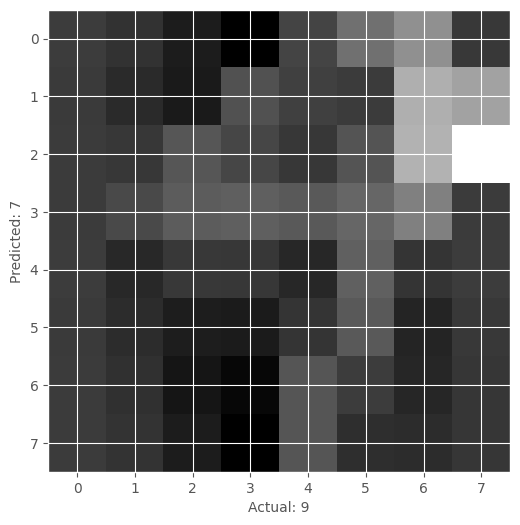

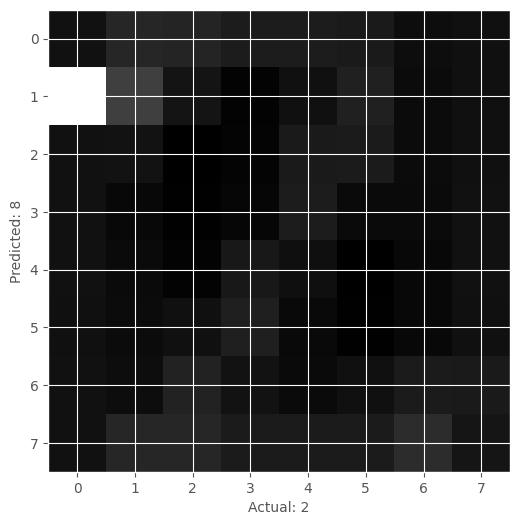

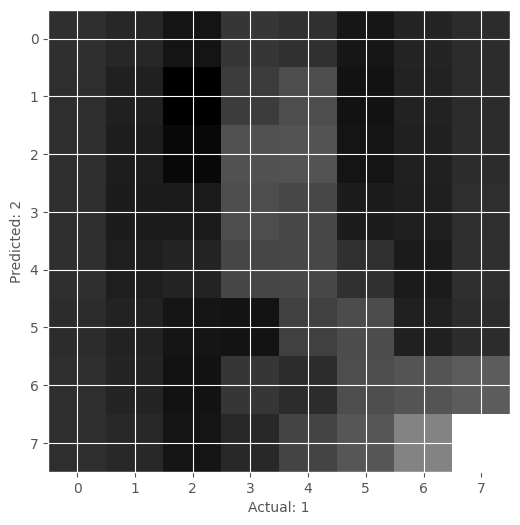

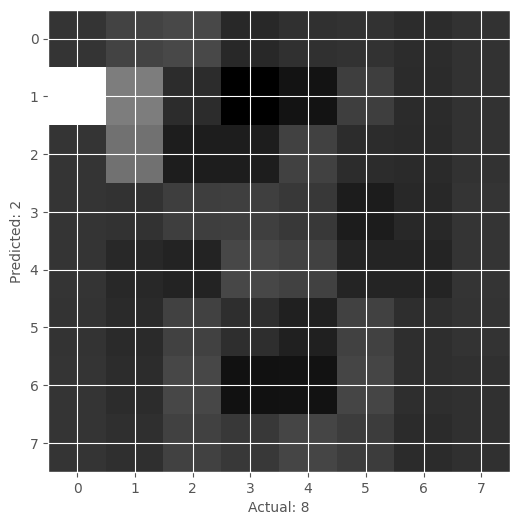

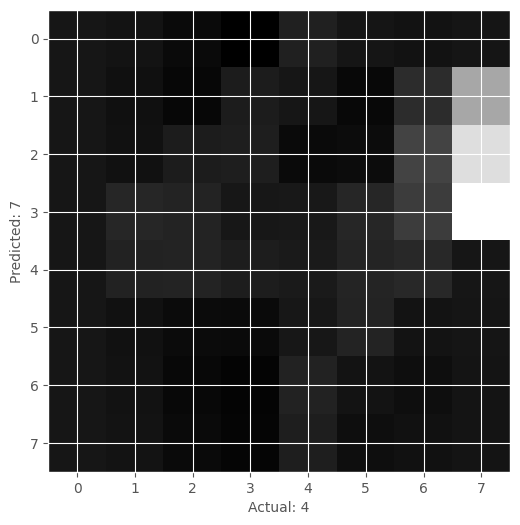

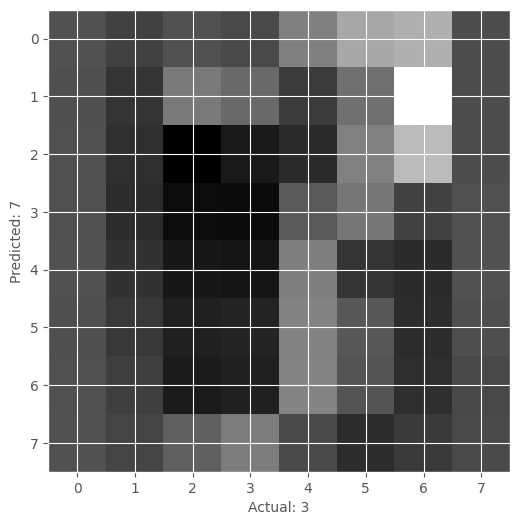

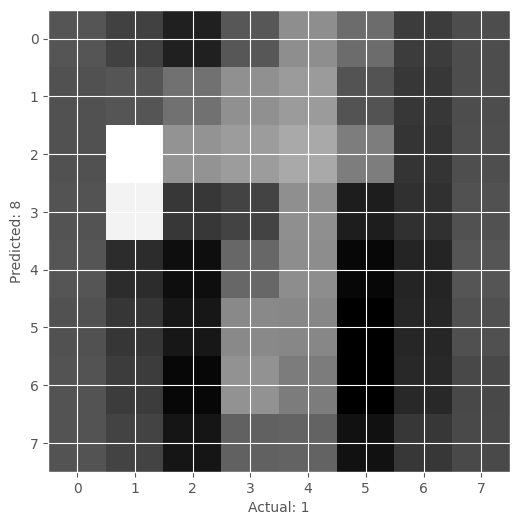

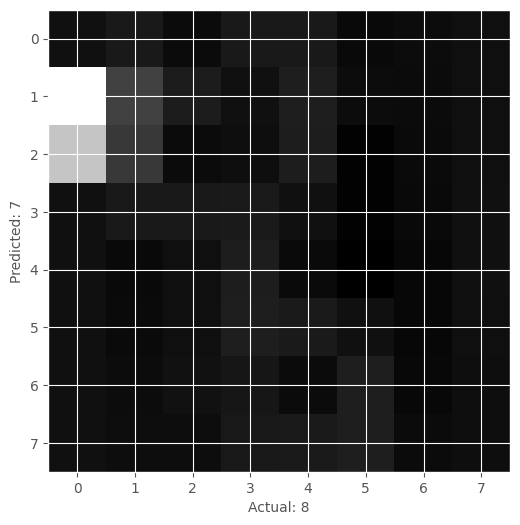

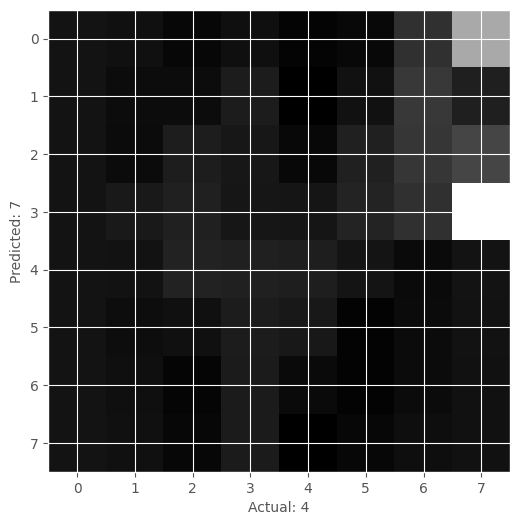

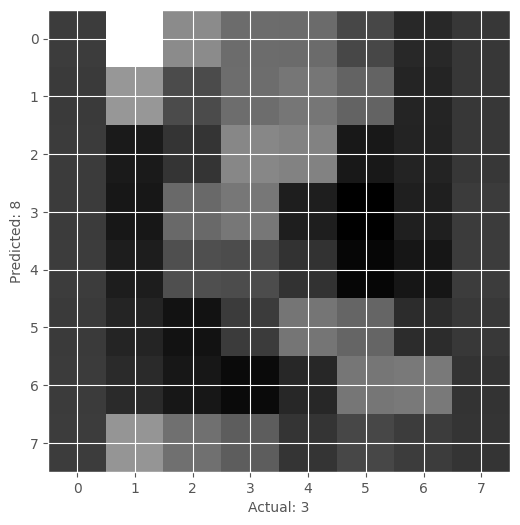

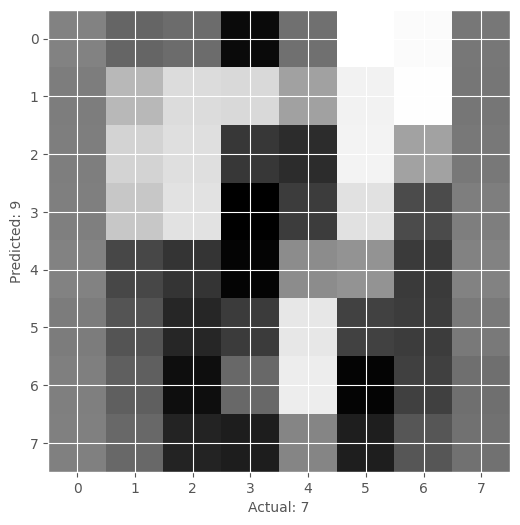

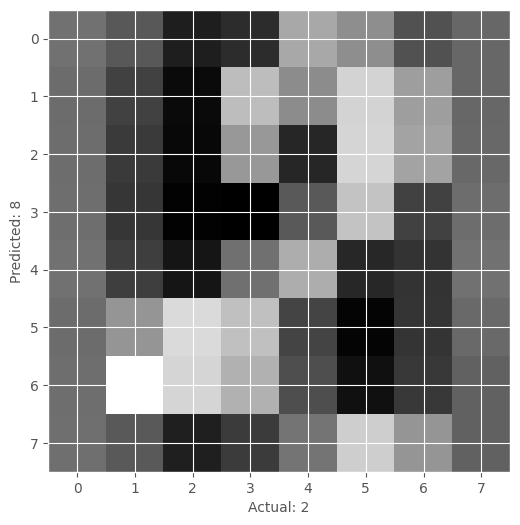

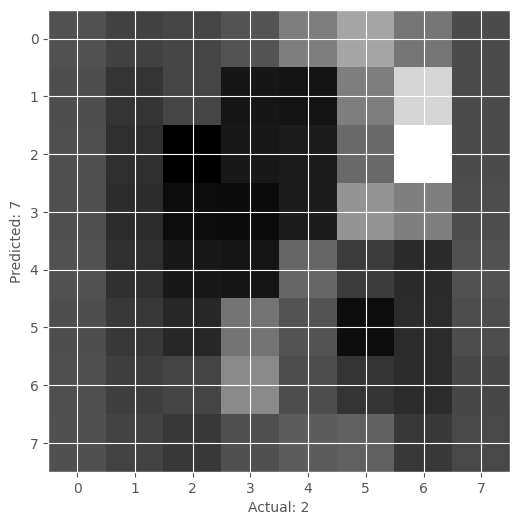

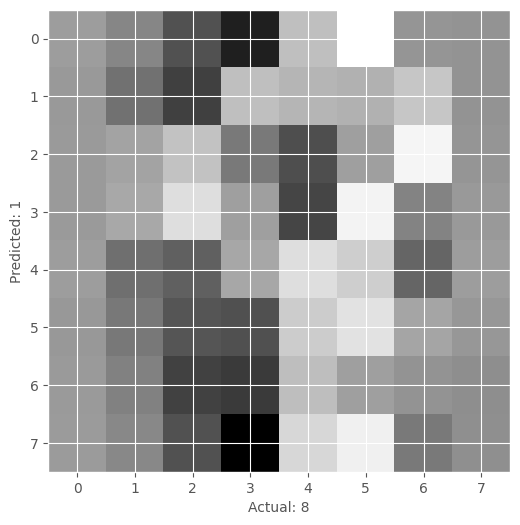

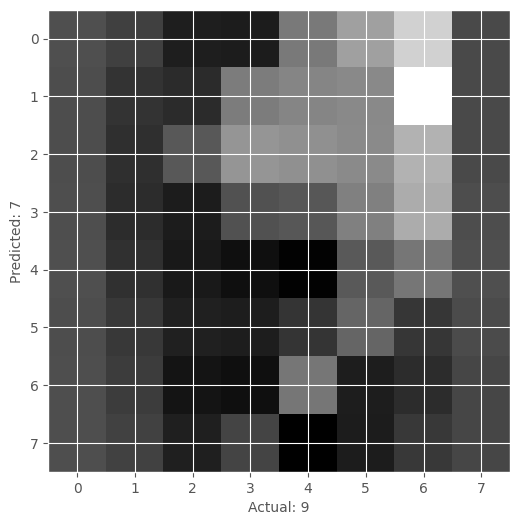

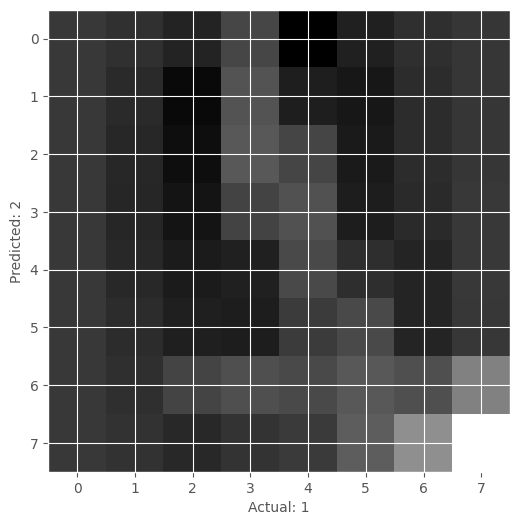

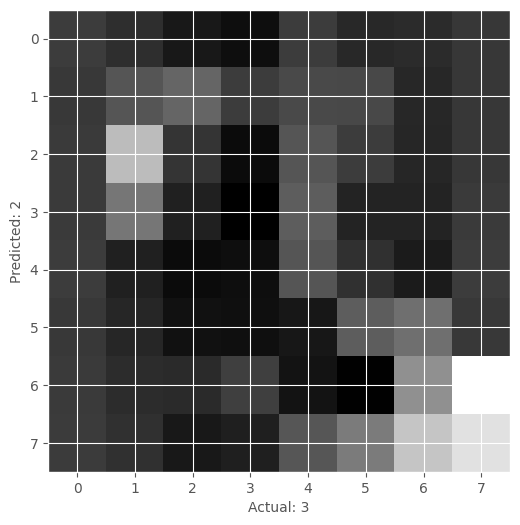

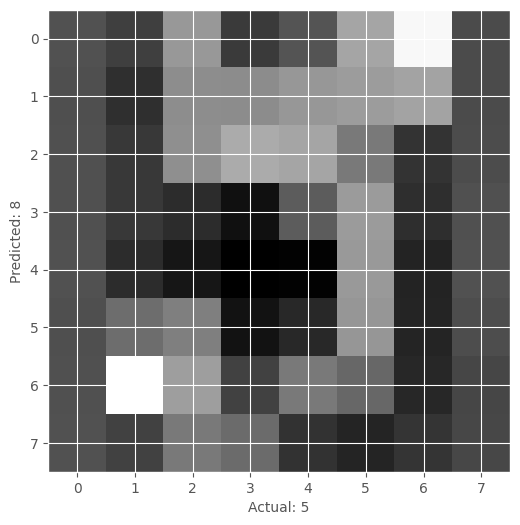

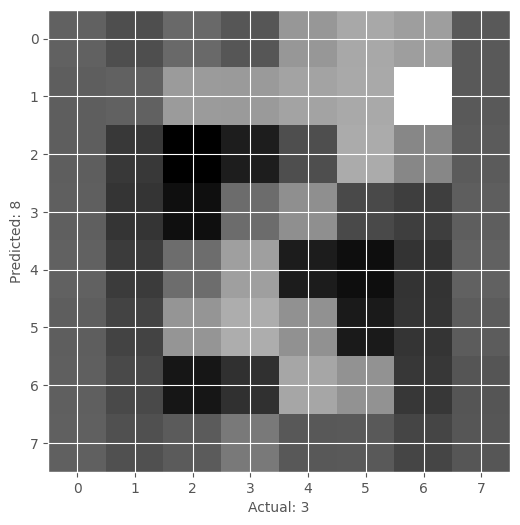

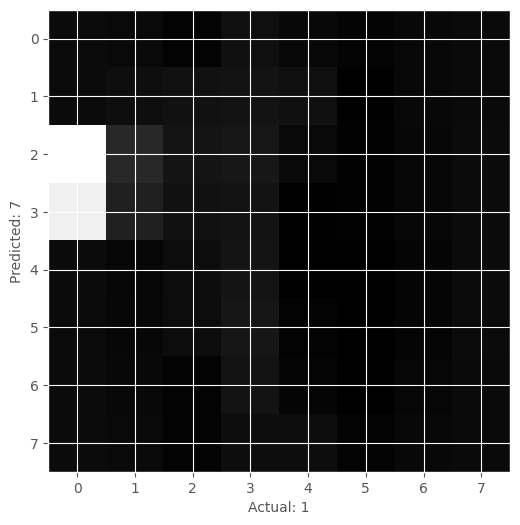

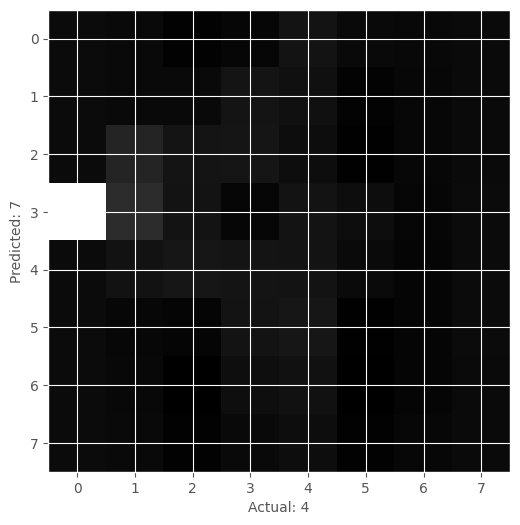

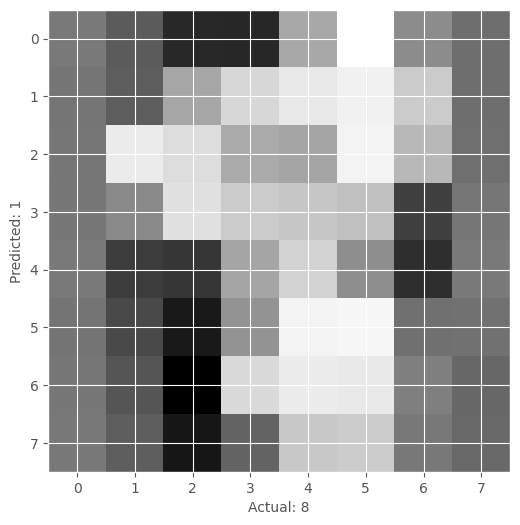

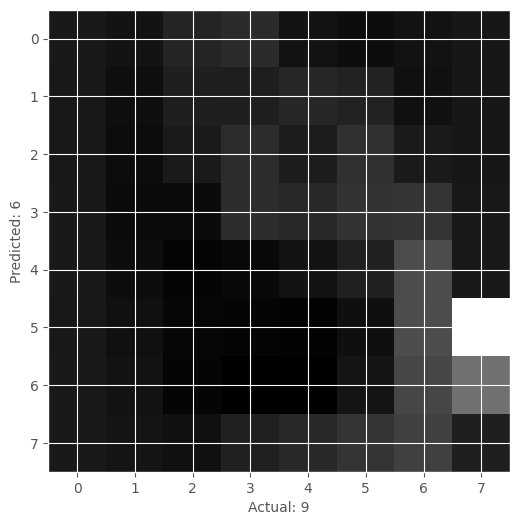

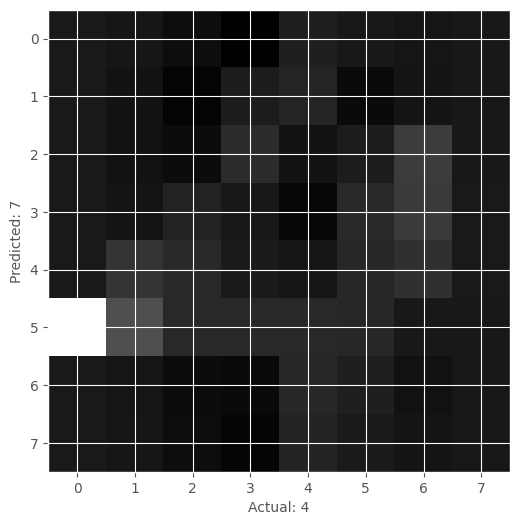

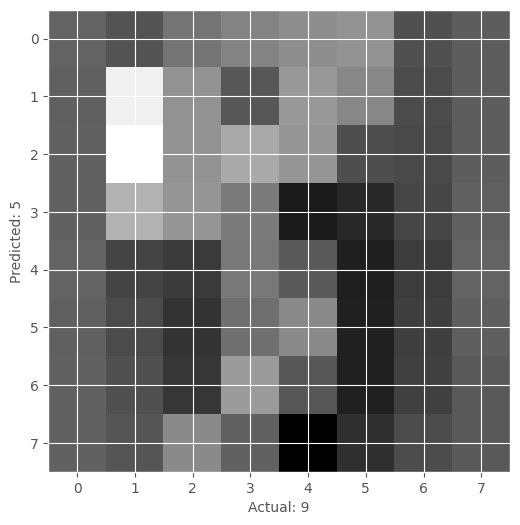

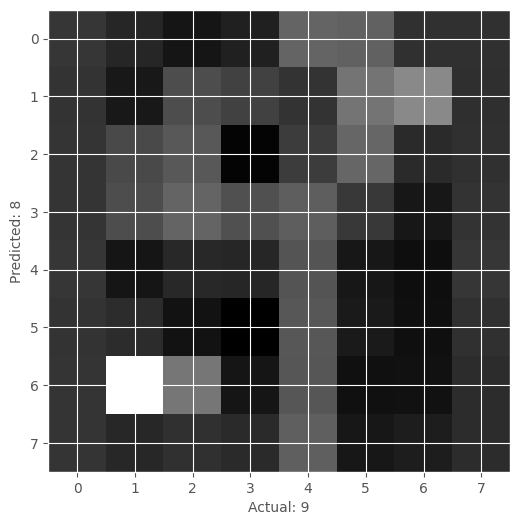

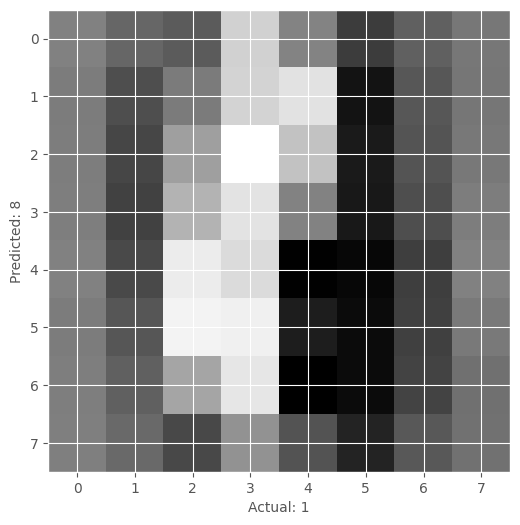

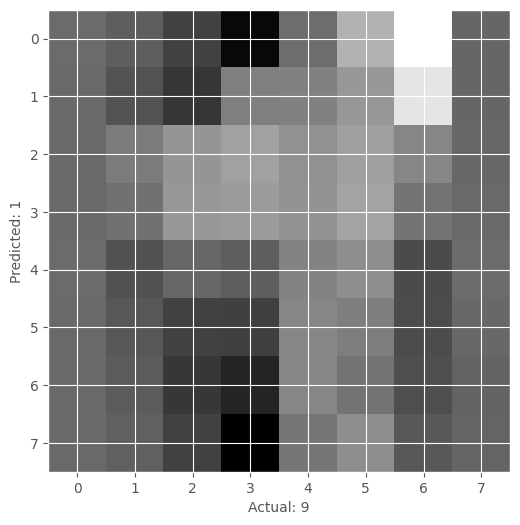

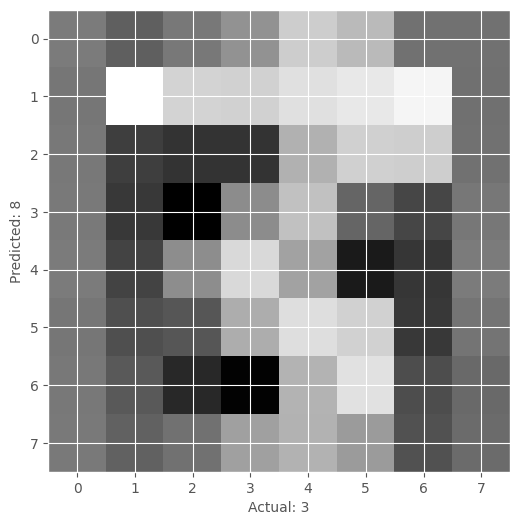

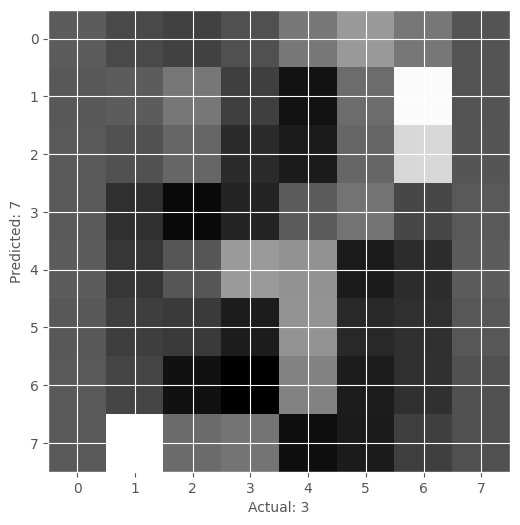

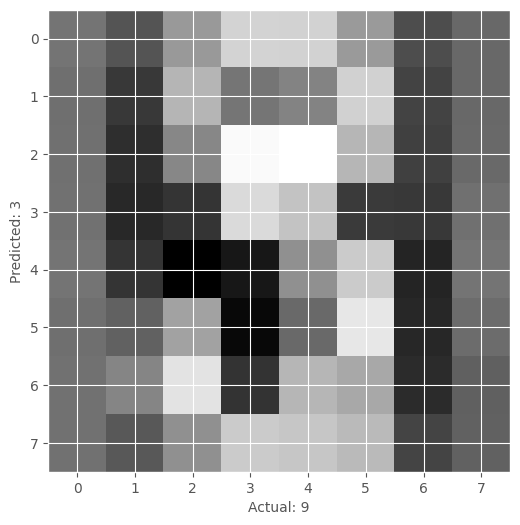

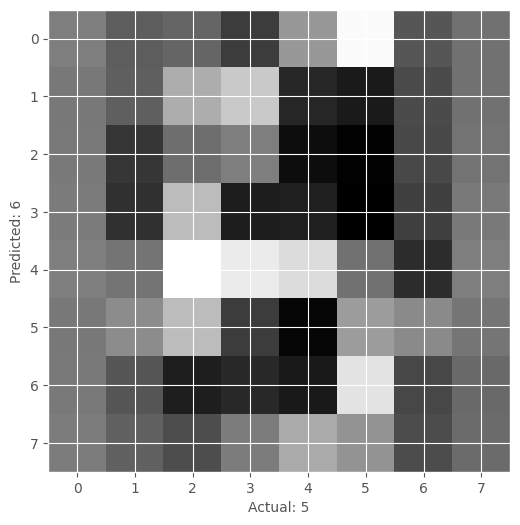

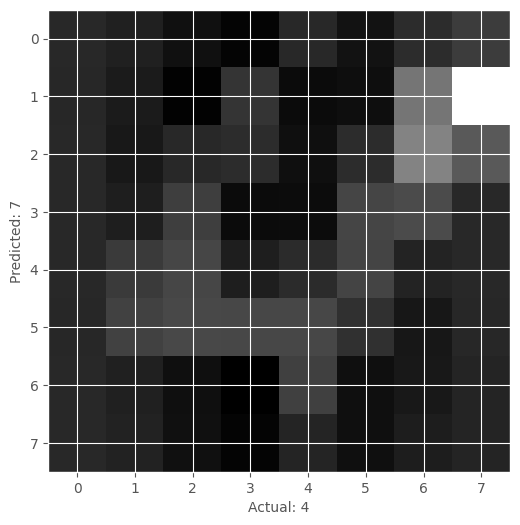

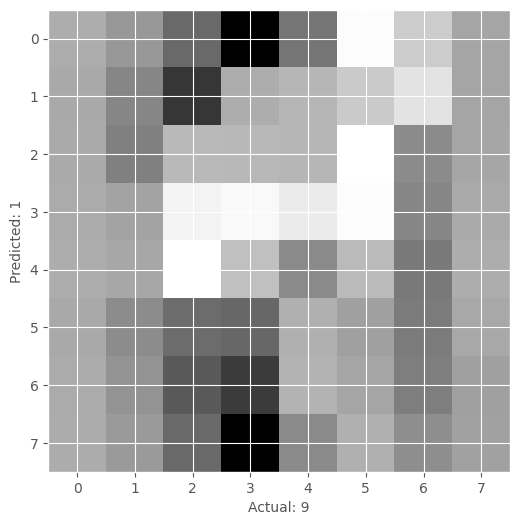

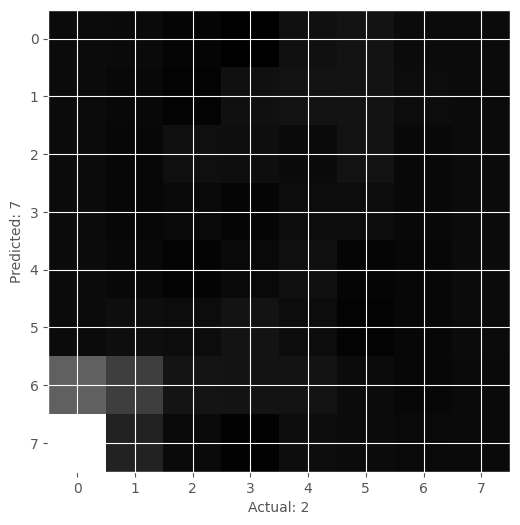

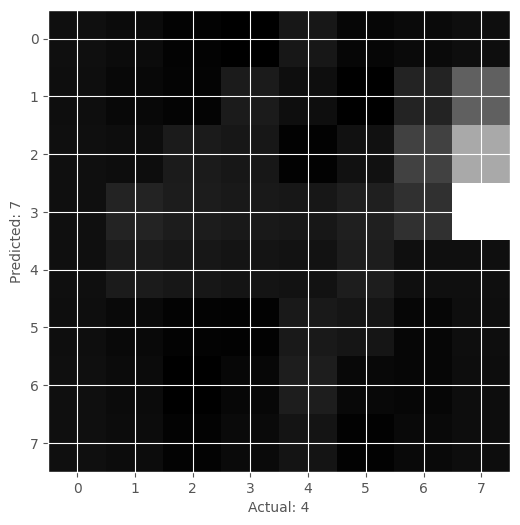

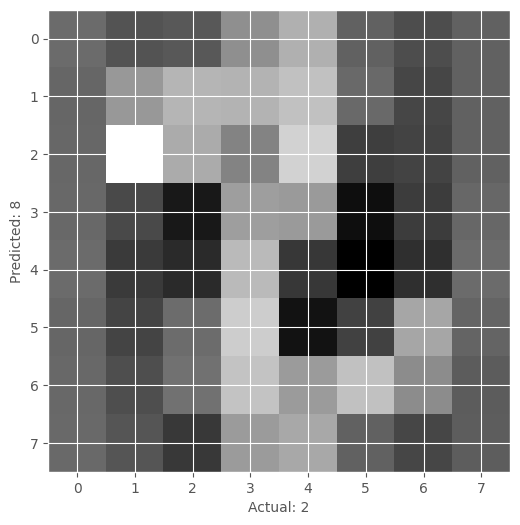

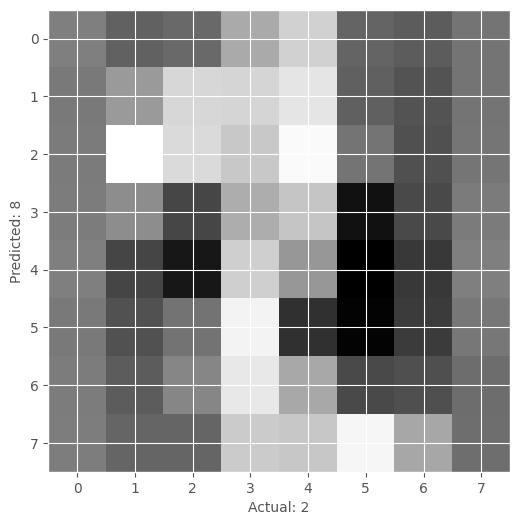

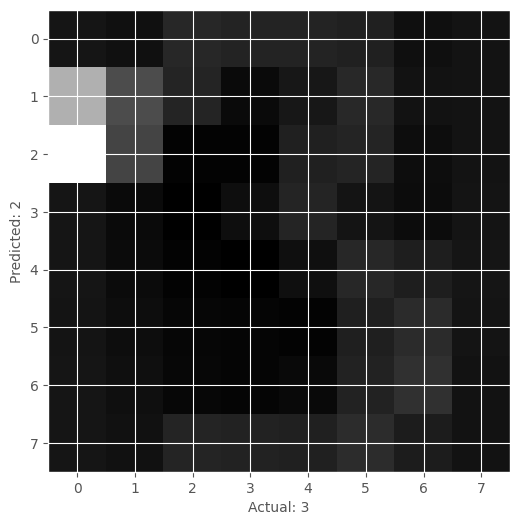

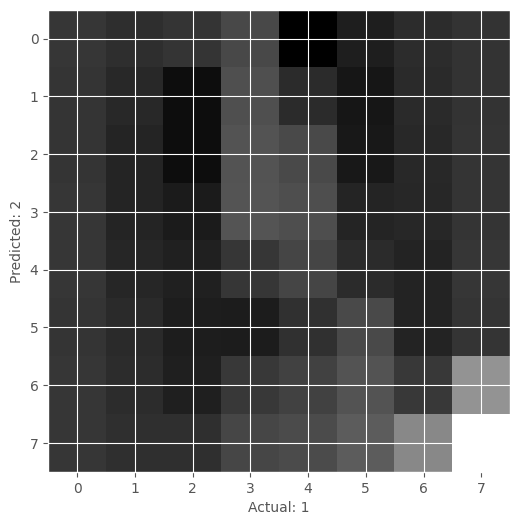

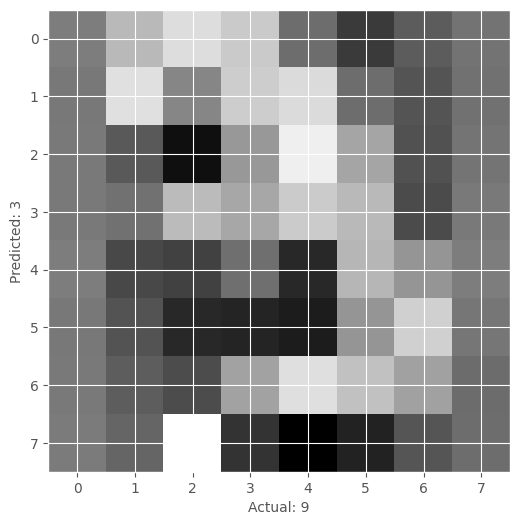

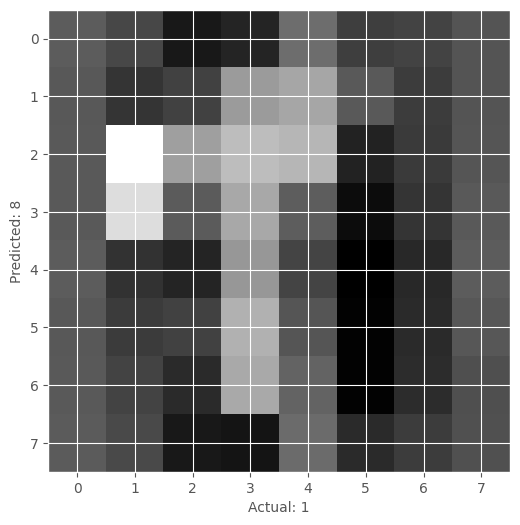

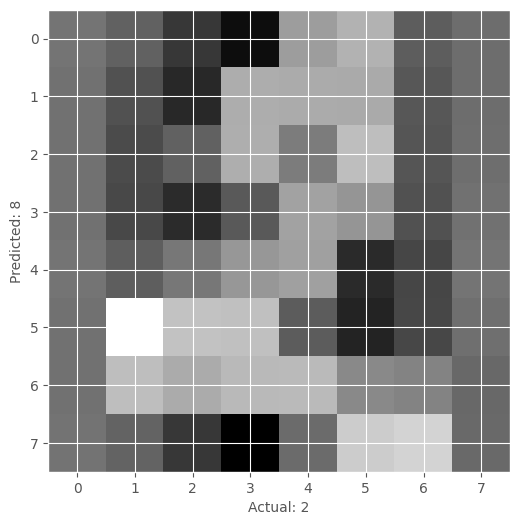

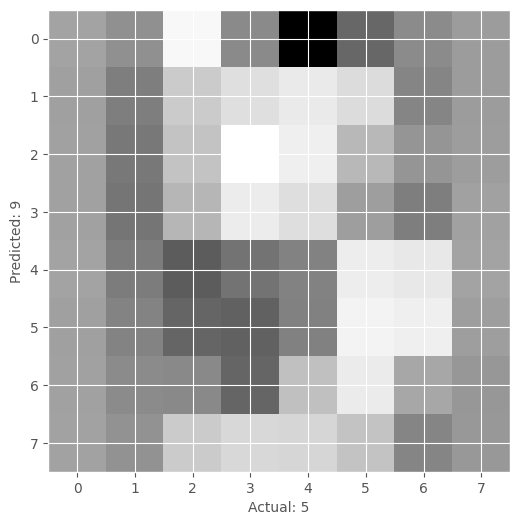

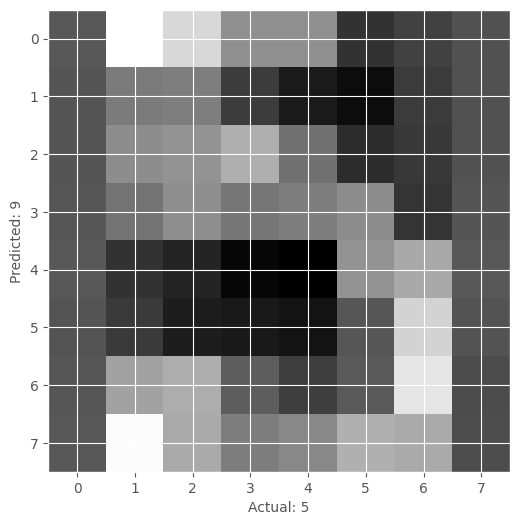

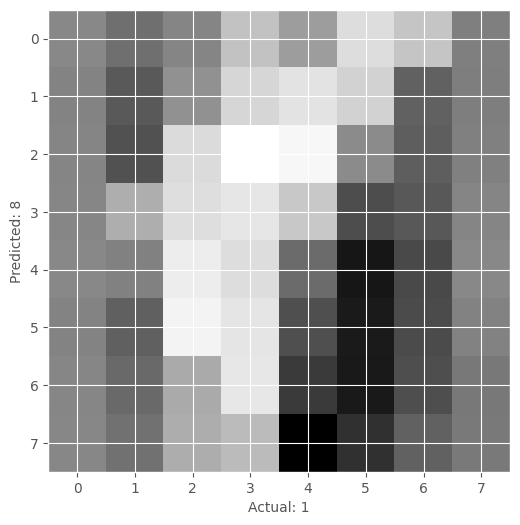

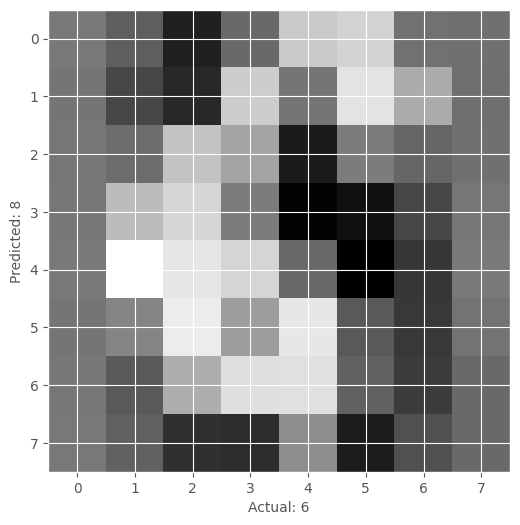

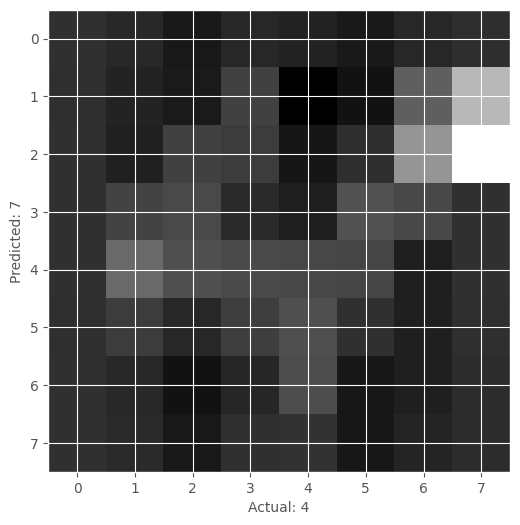

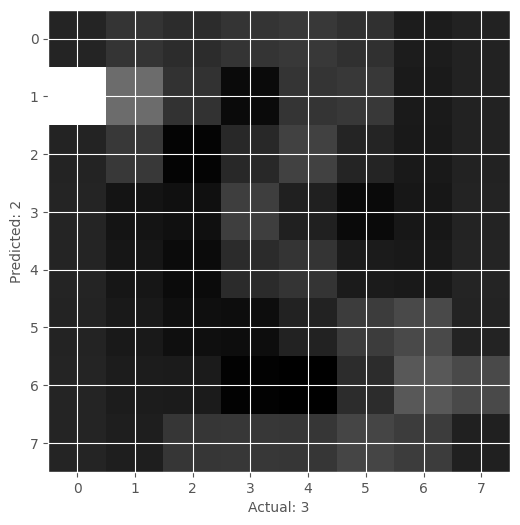

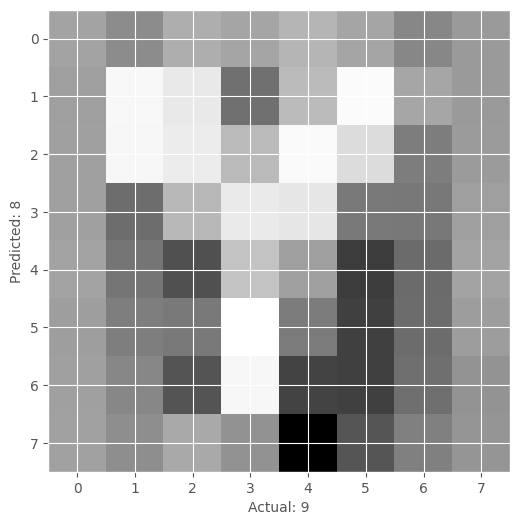

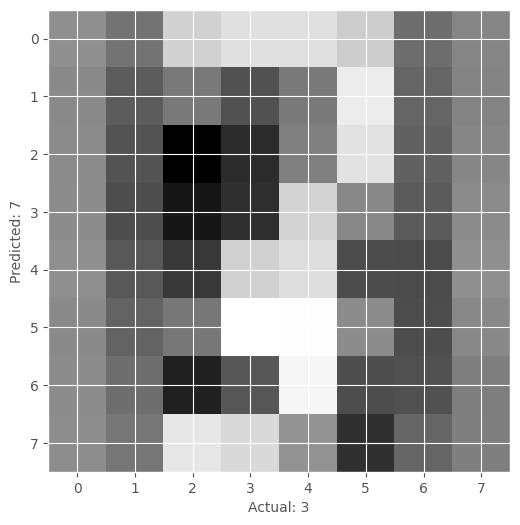

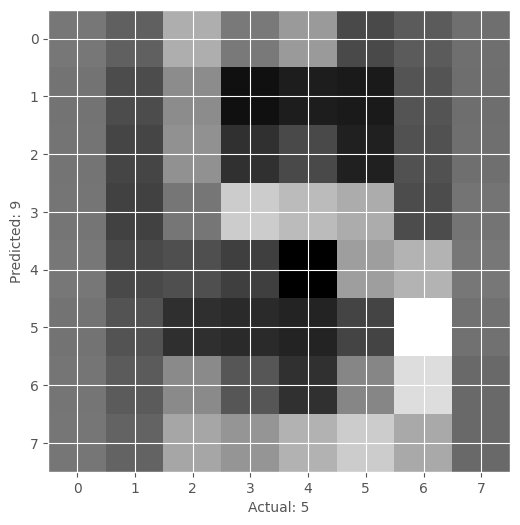

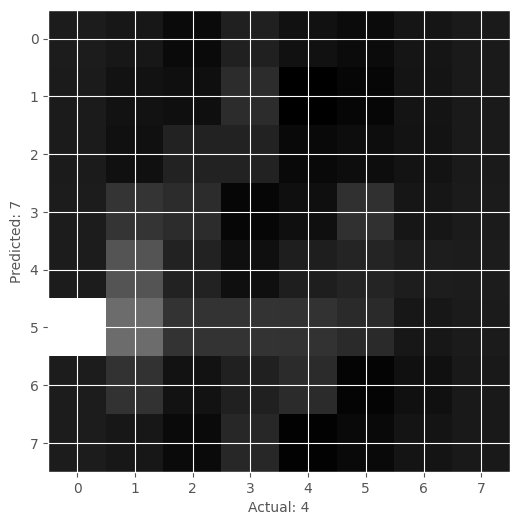

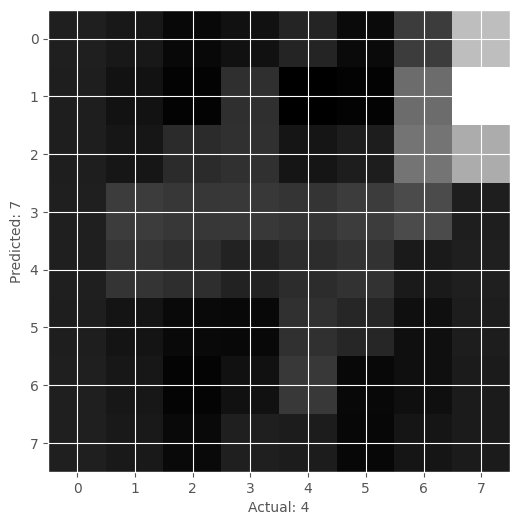

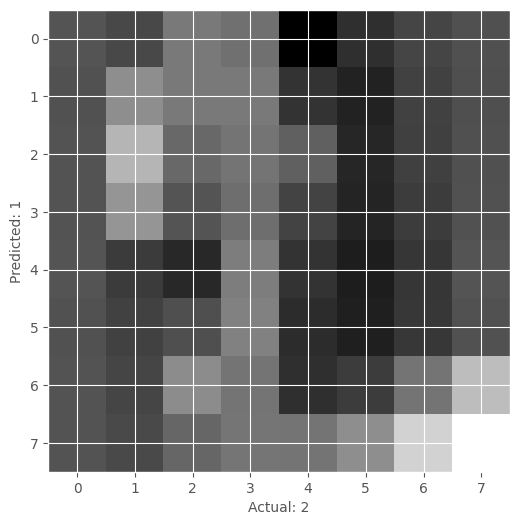

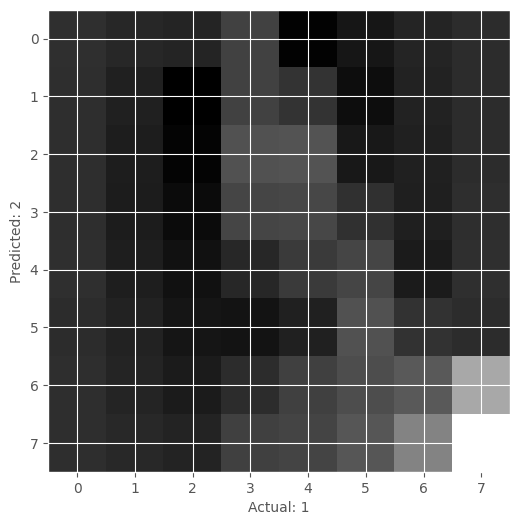

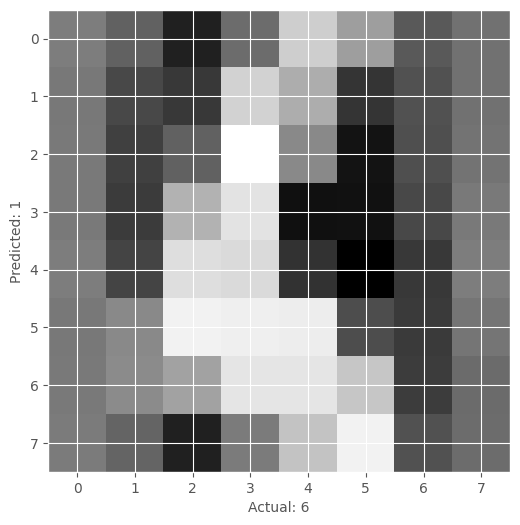

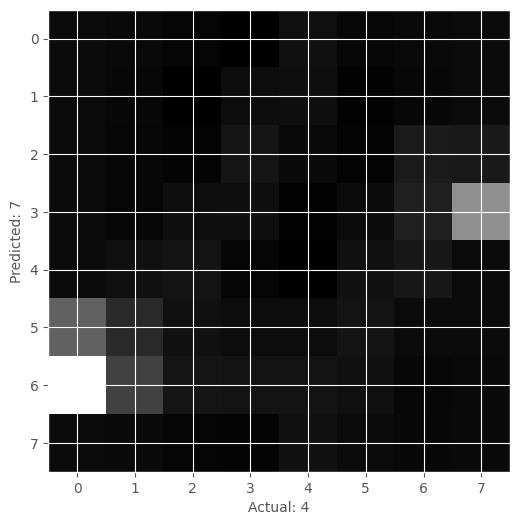

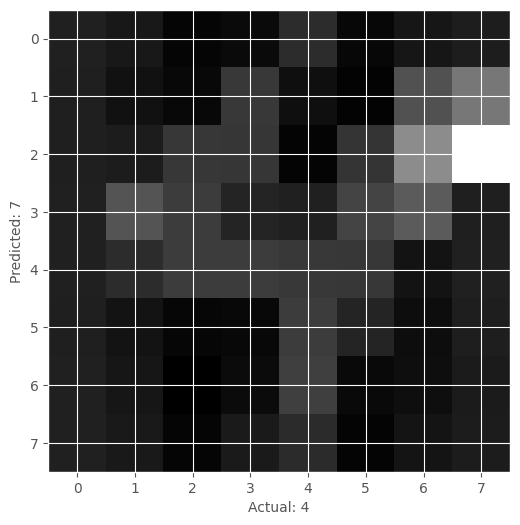

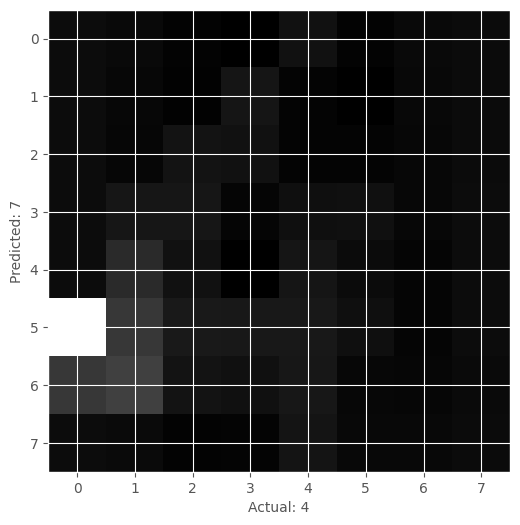

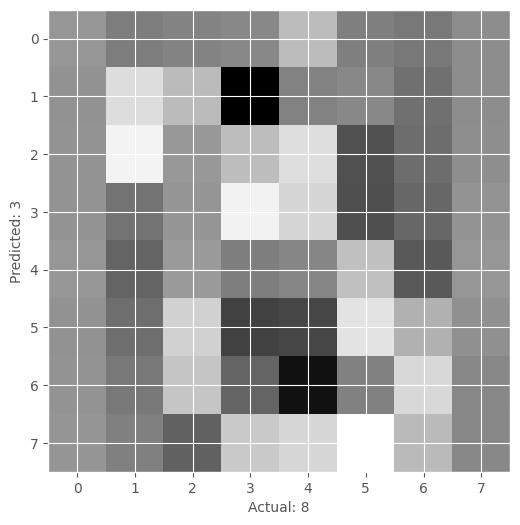

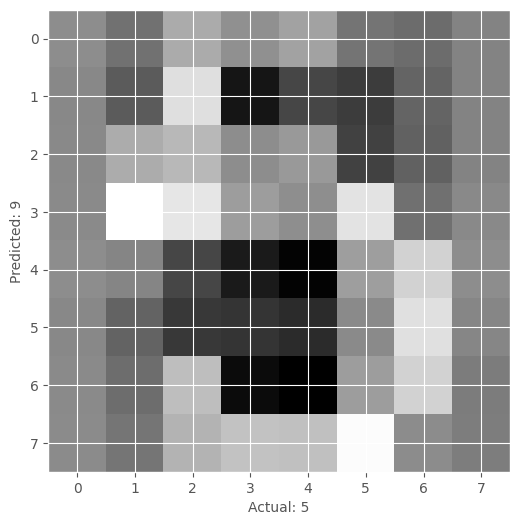

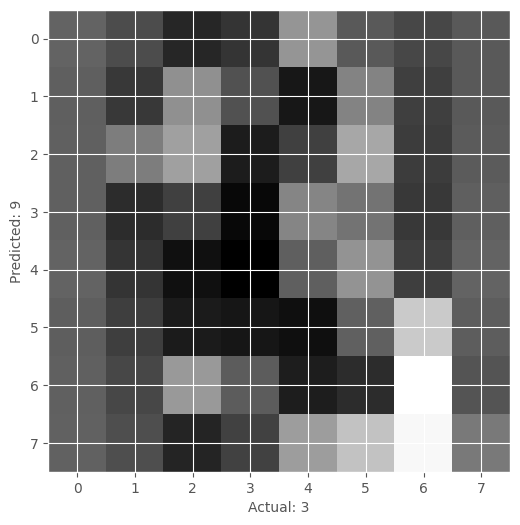

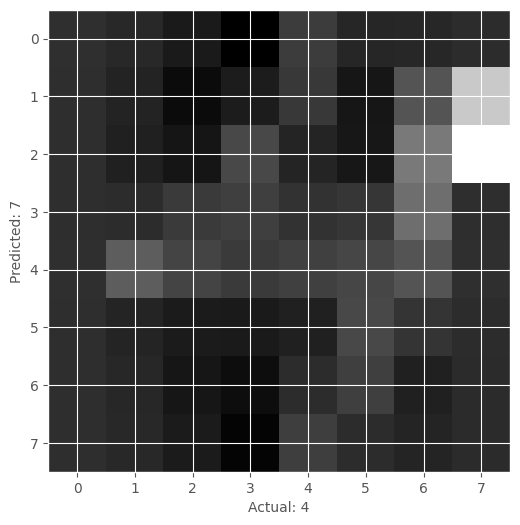

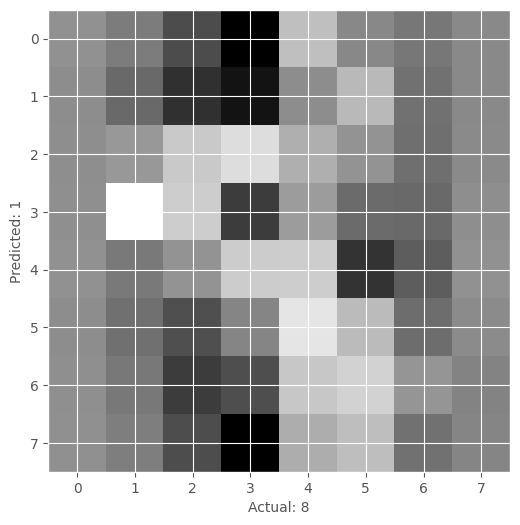

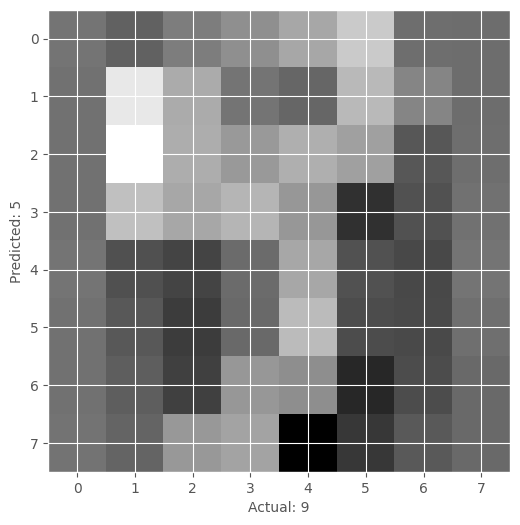

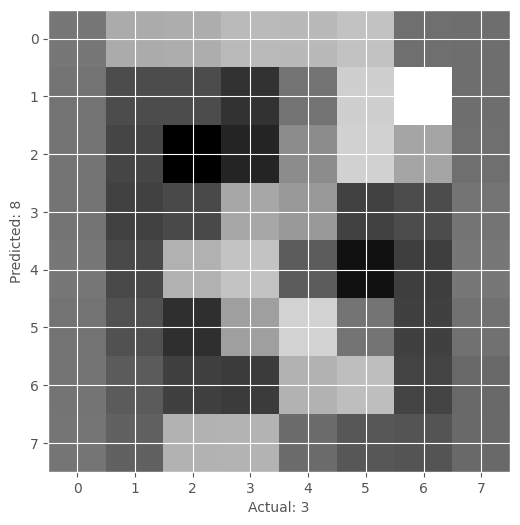

The total number of incorrect digits is: 67


In [59]:
#Display all the misclassified digits as images
counter = 0

for i in range(y_pred.size):
    if y_pred[i] != y_test[i]:
        plt.gray()
        plt.imshow(np.reshape(x_test[i],(8,8)), cmap='gray')
        pridictedDigit = "Predicted: " + str(y_pred[i])
        actualDigit = "Actual: " + str(y_test[i])
        plt.xlabel(actualDigit, fontsize=10)
        plt.ylabel(pridictedDigit, fontsize=10)
        plt.show()
        counter+= 1
print("The total number of incorrect digits is: " + str(counter))

In [60]:
# Generates 100 evenly spaced values between 1 and 500
C_values = np.linspace(1, 500, 100)
accuracy_scores = []

# Evaluate each model with different C values
for C in C_values:
    model = SVC(kernel='rbf', C=C)
    # Perform cross-validation and store the mean accuracy
    scores = cross_val_score(model, x_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

# Determine the best C value and its corresponding accuracy
best_index = np.argmax(accuracy_scores)
best_C = C_values[best_index]
best_accuracy = accuracy_scores[best_index]

print(f'Best C value: {best_C}')
print(f'Best Cross-Validated Accuracy: {best_accuracy}')

Best C value: 6.040404040404041
Best Cross-Validated Accuracy: 0.9359937402190923


In [61]:
#Train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?
rawDigits = load_digits()
x2 = rawDigits.data
y2 = rawDigits.target

n_samples2, n_features2 = x2.shape
n_digits2 = len( np.unique(rawDigits.target) )

x_train2, x_test2, y_train2, y_test2 = train_test_split( x2, y2, random_state=1, test_size=0.8 )

rawModel = svm.SVC(kernel='rbf', C=5)
rawModel.fit(x_train2,y_train2)

print('Confusion Matrix:')
y_pred2 = rawModel.predict(x_test2)
print(metrics.confusion_matrix(y_true = y_test2, y_pred = y_pred2))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test2, y_pred = y_pred2))

Confusion Matrix:
[[129   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   5   0]
 [  0   0 141   0   0   0   0   0   1   0]
 [  0   0   0 140   0   1   0   2   3   1]
 [  0   0   0   0 152   0   0   0   0   0]
 [  0   0   0   0   0 143   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   0   0   0   0   0   0 129   1]
 [  0   1   0   4   0   1   0   1   3 142]]
Accuracy =  0.9756606397774688


The accuracy score on the raw (non-scaled) data is 97.5%. 

### KNN

In [62]:
knnDigits = load_digits()
knn_x = scale( knnDigits.data )
knn_y = knnDigits.target

knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split( knn_x, knn_y, random_state=1, test_size=0.8 )

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(knn_x_train, knn_y_train)

print('Confusion Matrix:')
knn_y_pred = knn_model.predict(knn_x_test)
print(metrics.confusion_matrix(y_true = knn_y_test, y_pred = knn_y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = knn_y_test, y_pred = knn_y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874


The most frequent error overall seems to be misclassifying digit 9 as digit 1, with 10 instances. This type of error could suggest a visual similarity in how the digits are written or an issue with the model's sensitivity to certain features that distinguish these digits.


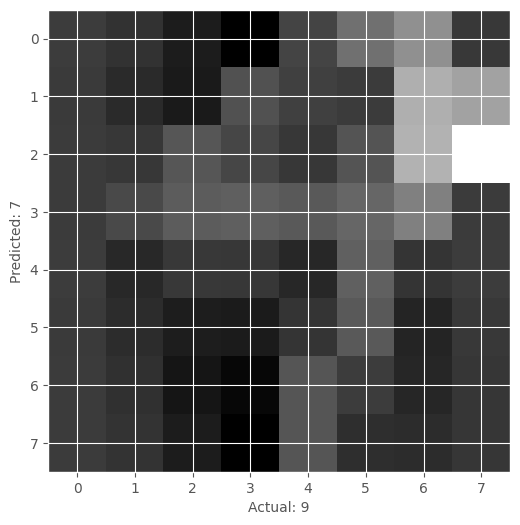

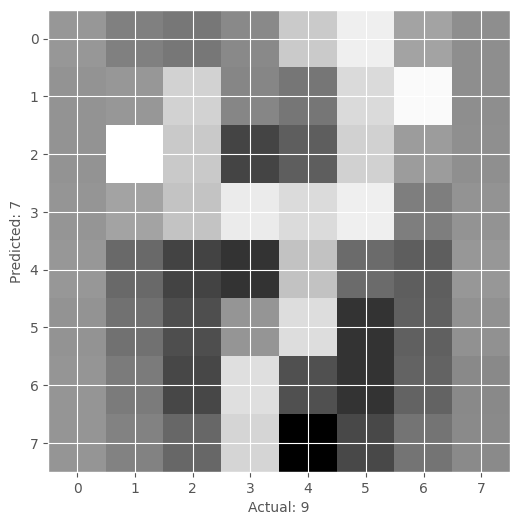

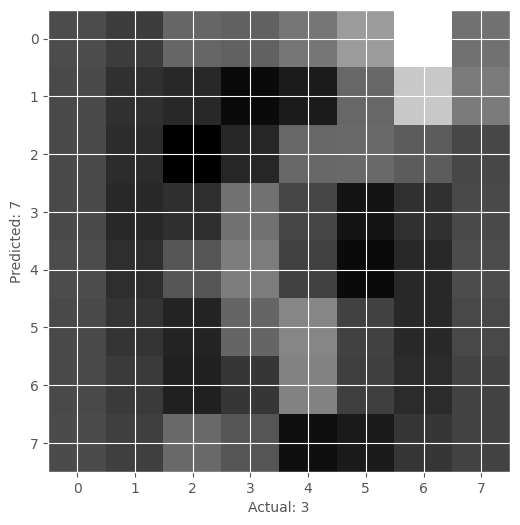

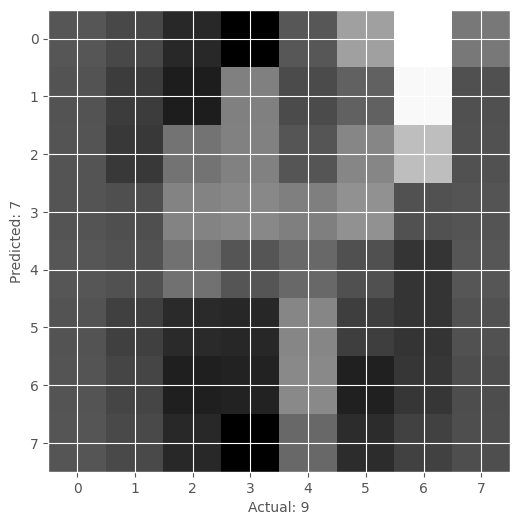

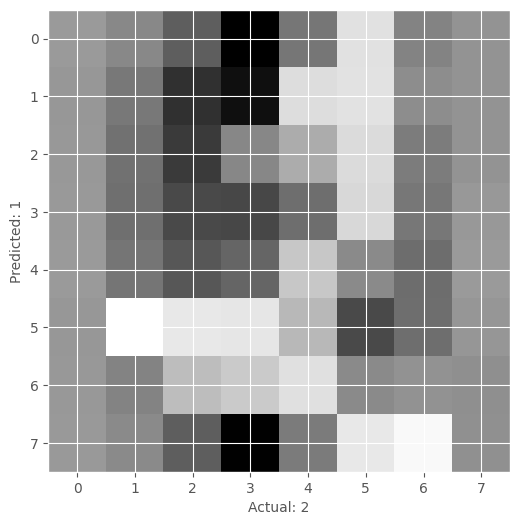

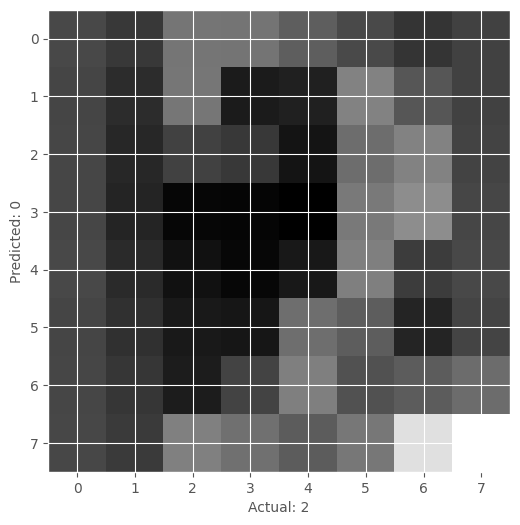

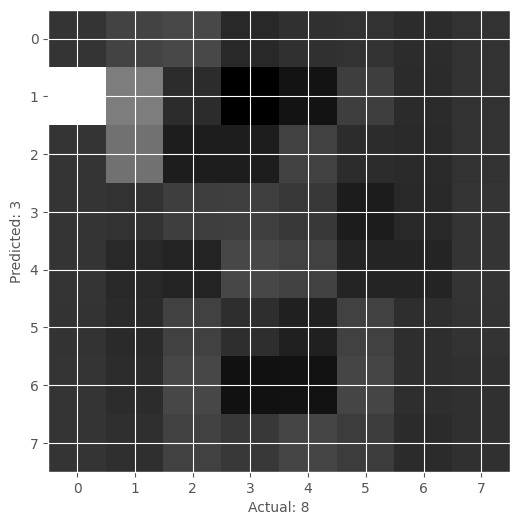

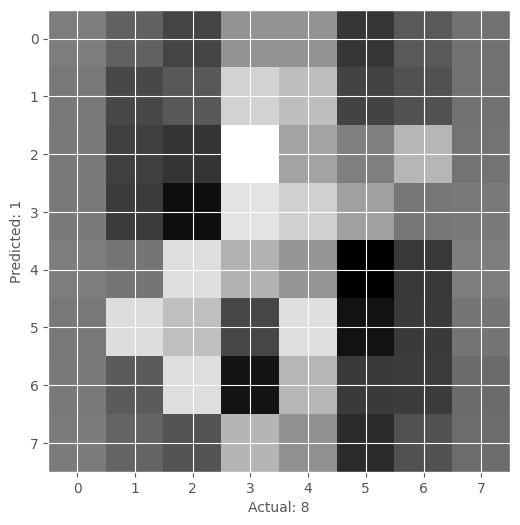

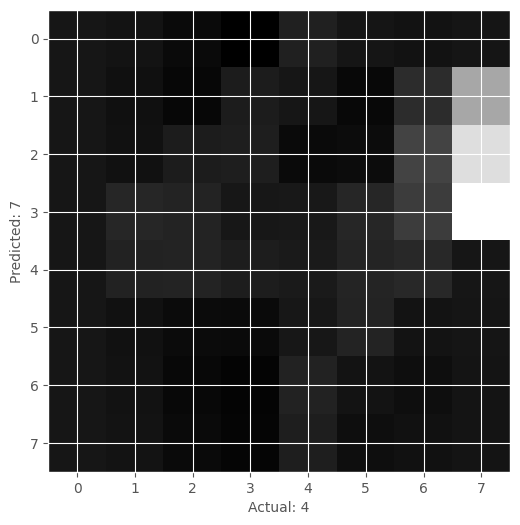

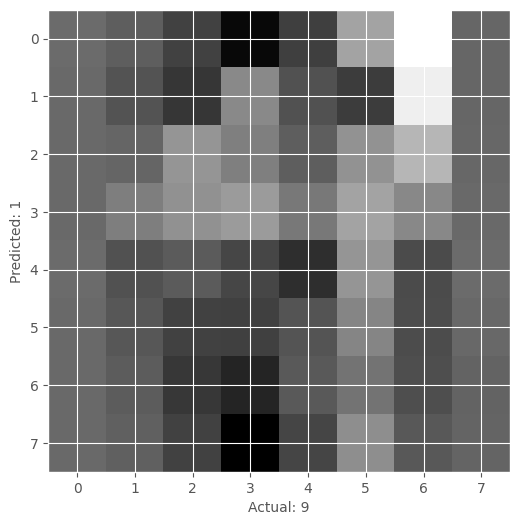

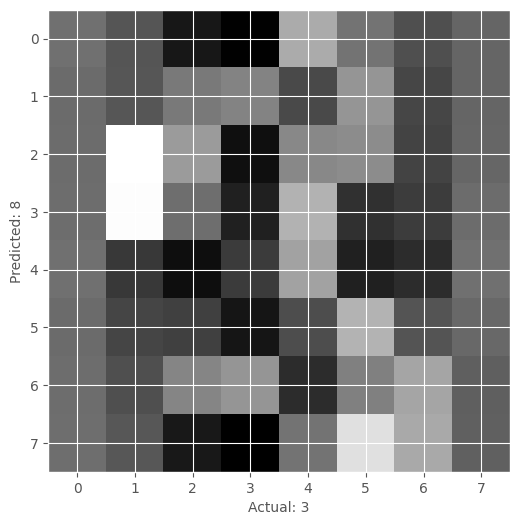

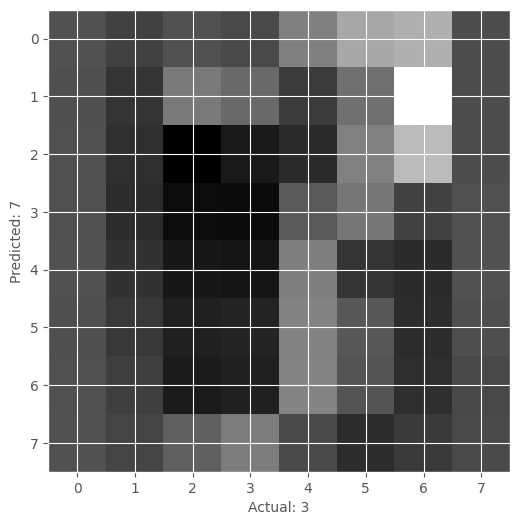

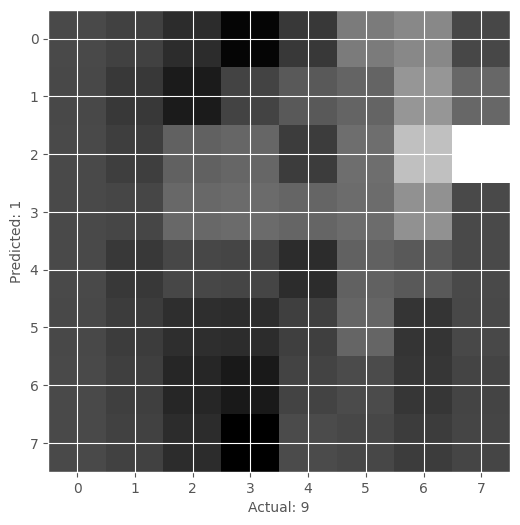

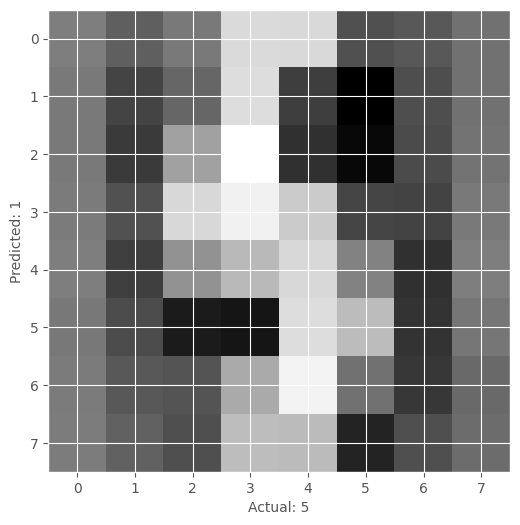

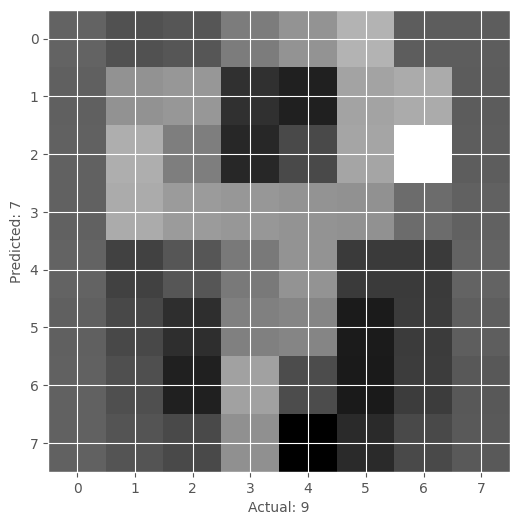

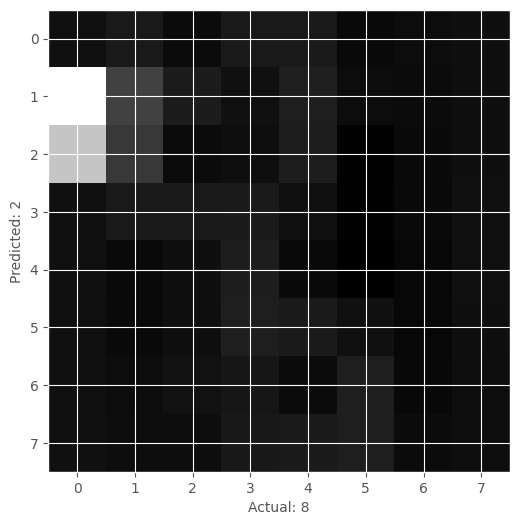

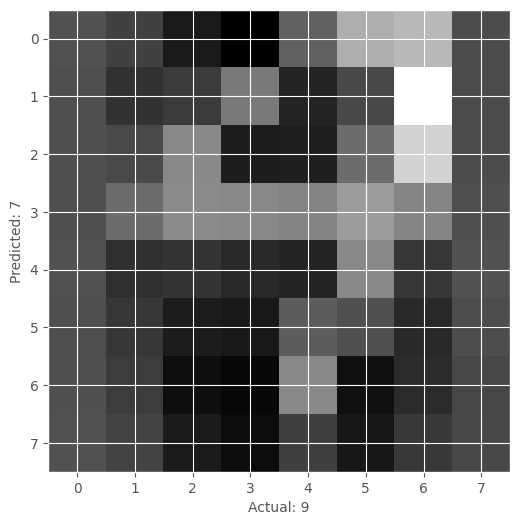

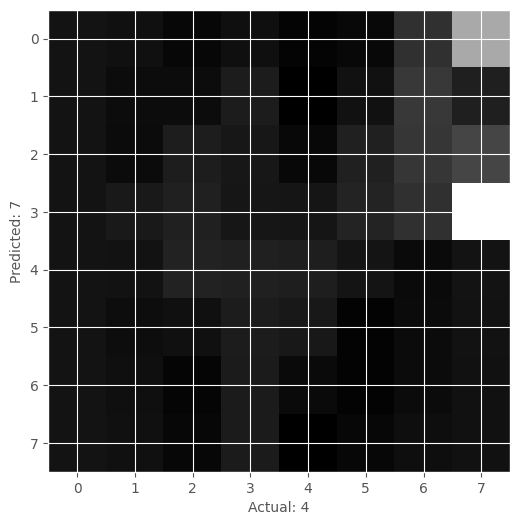

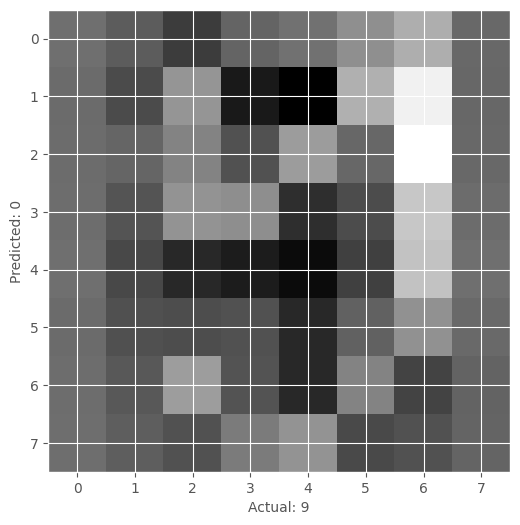

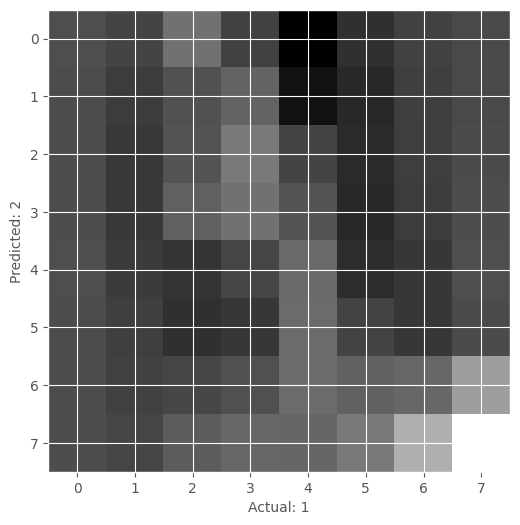

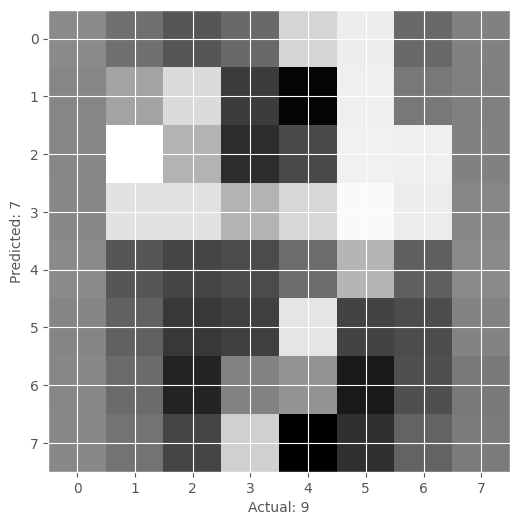

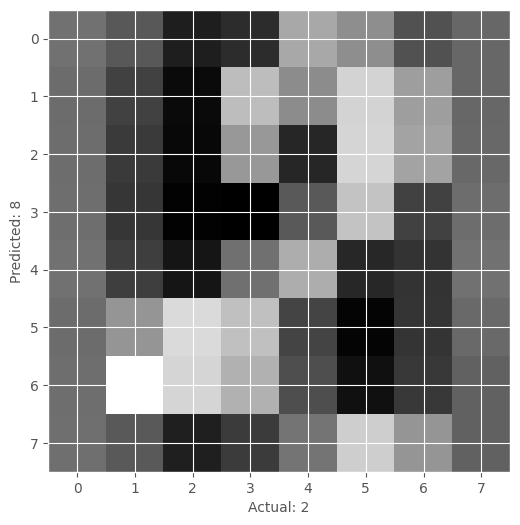

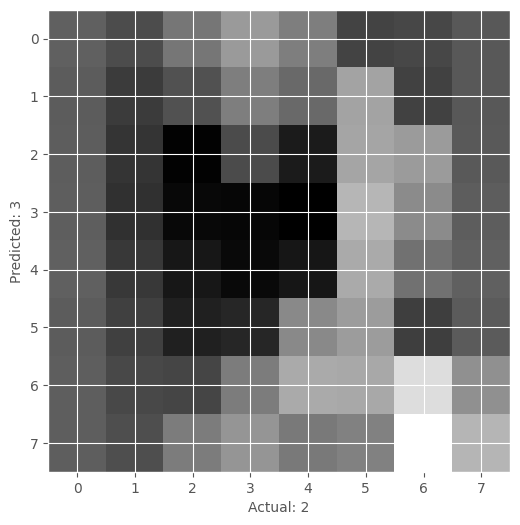

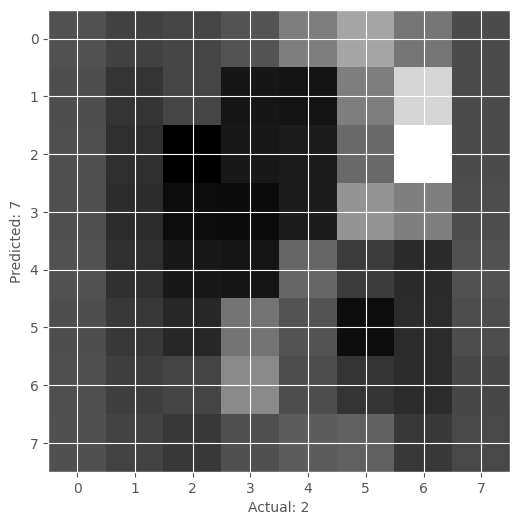

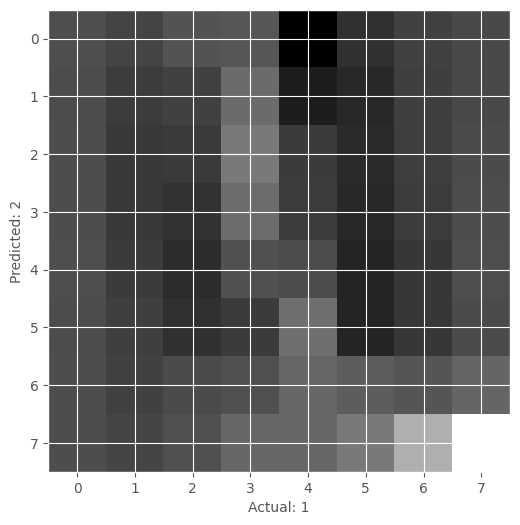

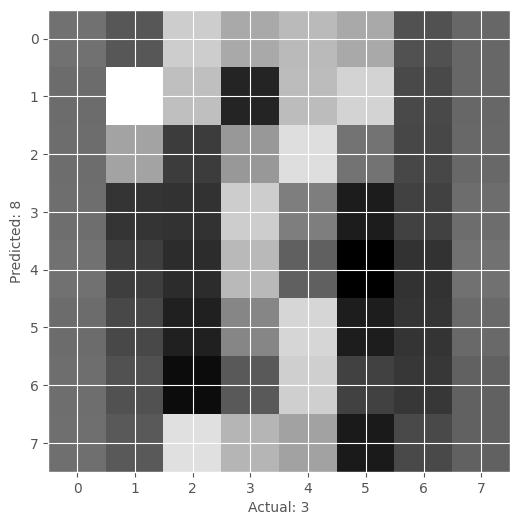

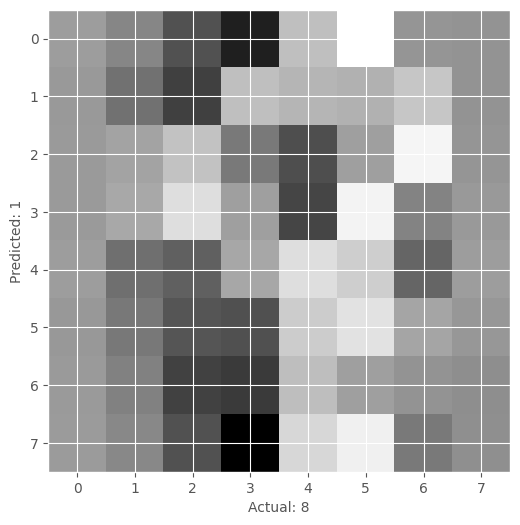

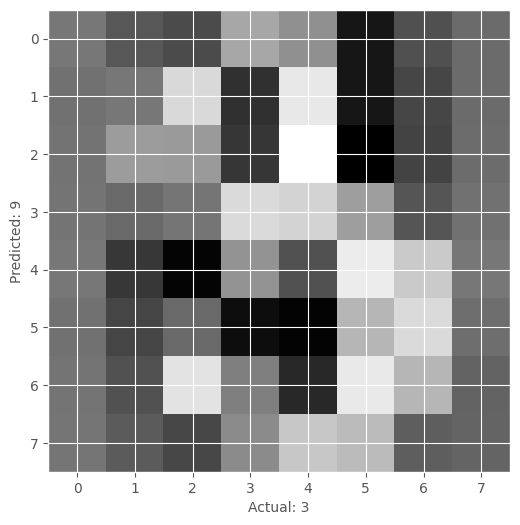

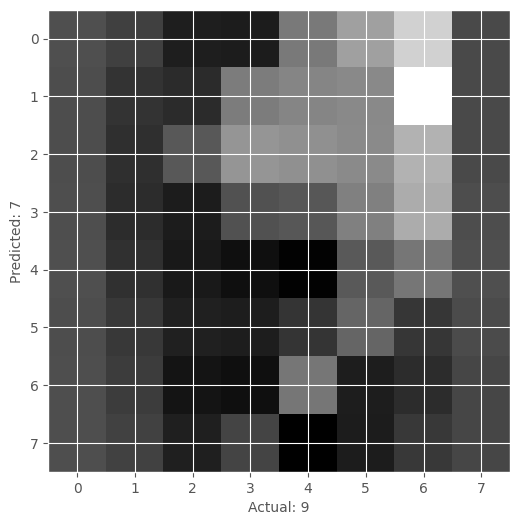

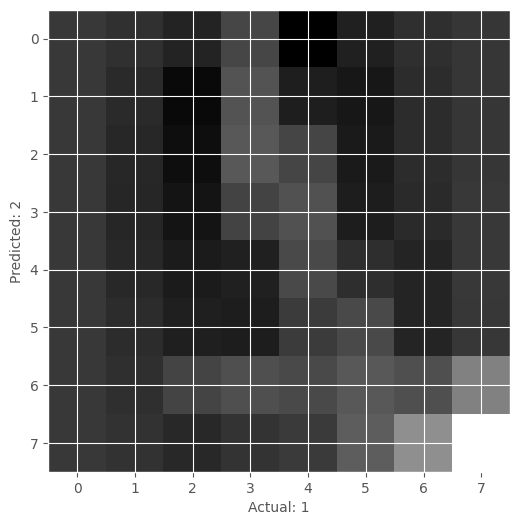

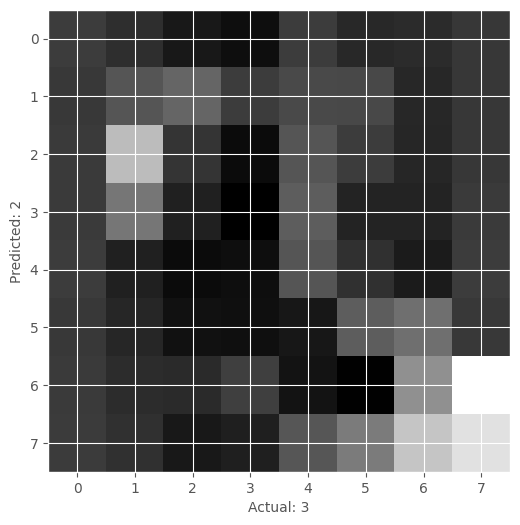

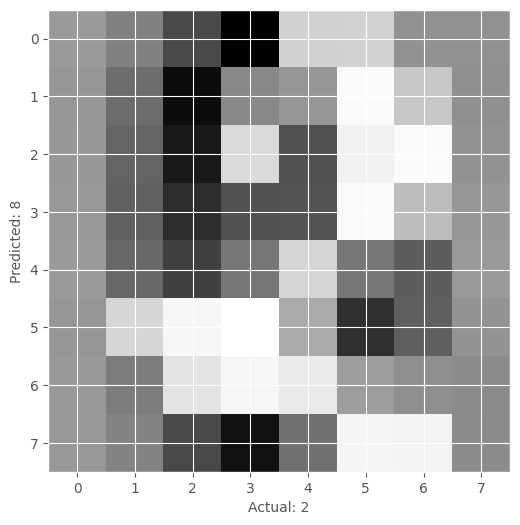

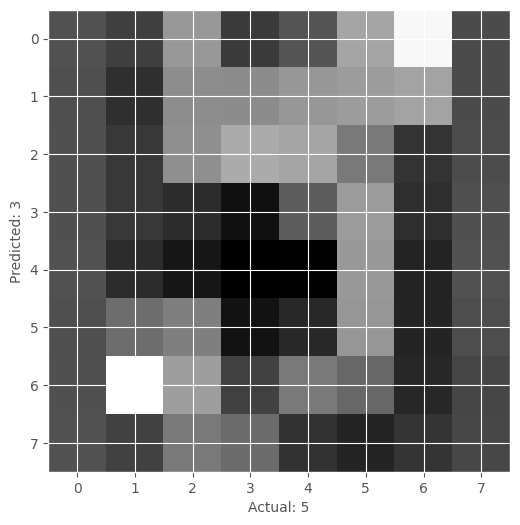

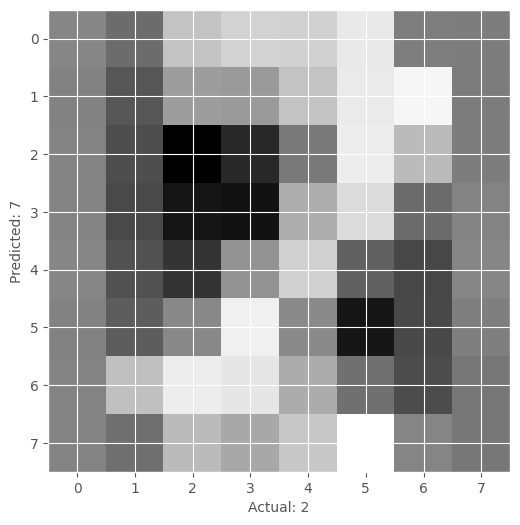

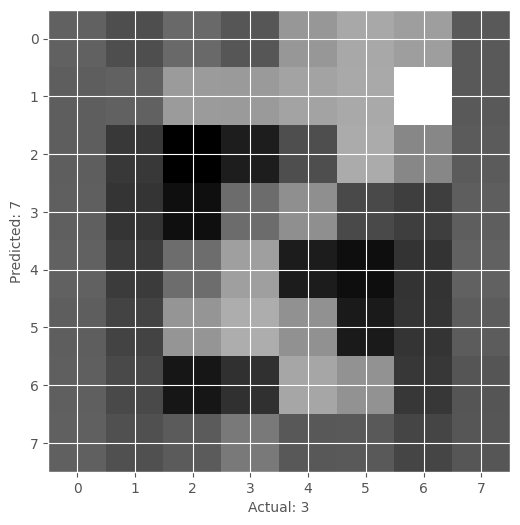

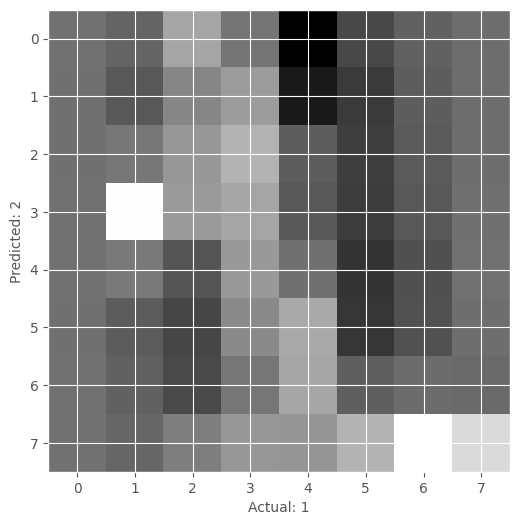

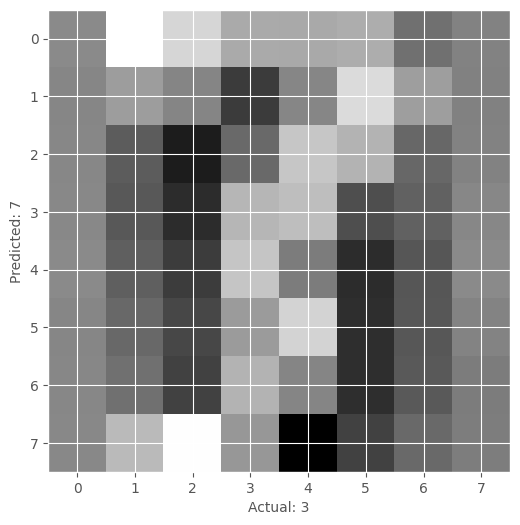

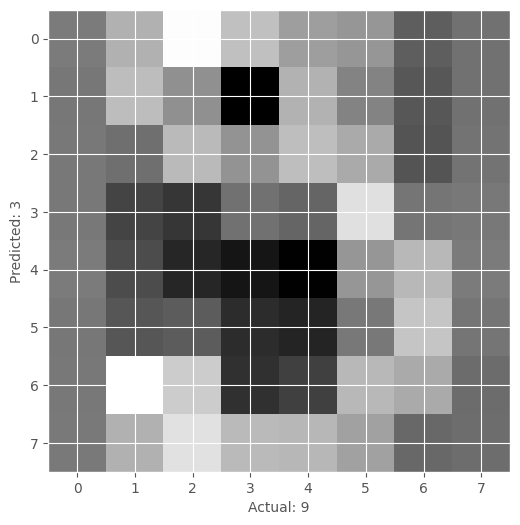

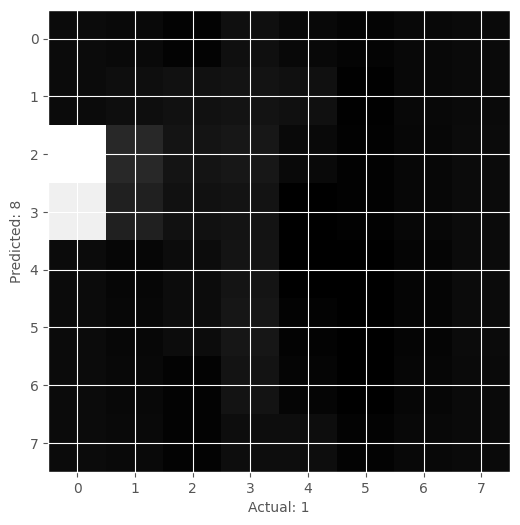

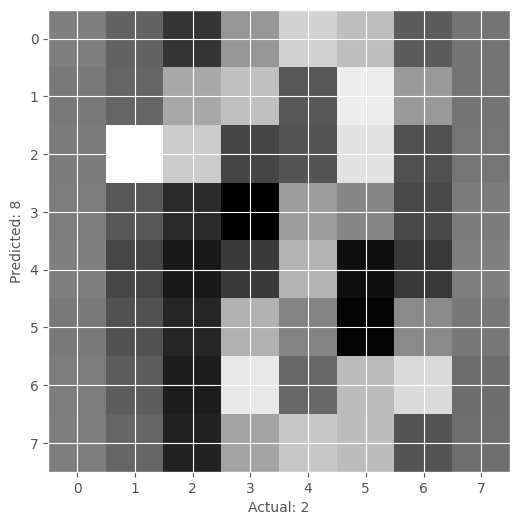

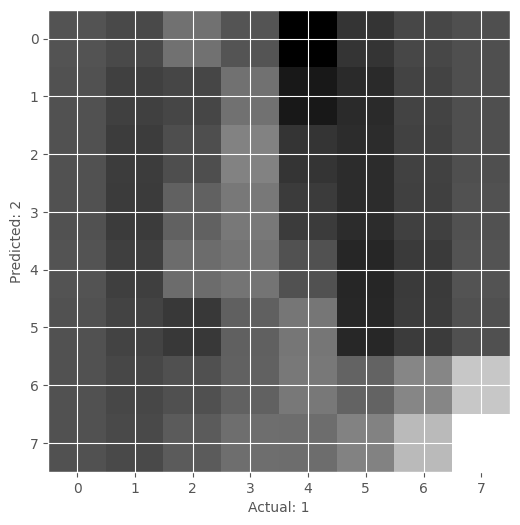

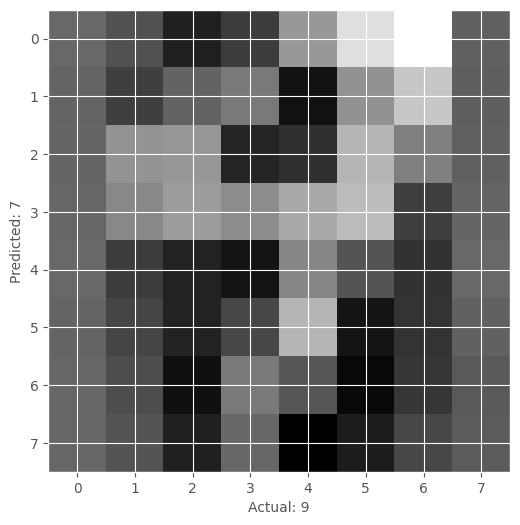

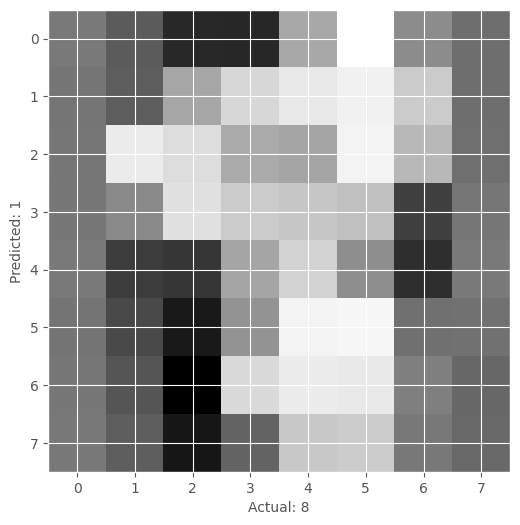

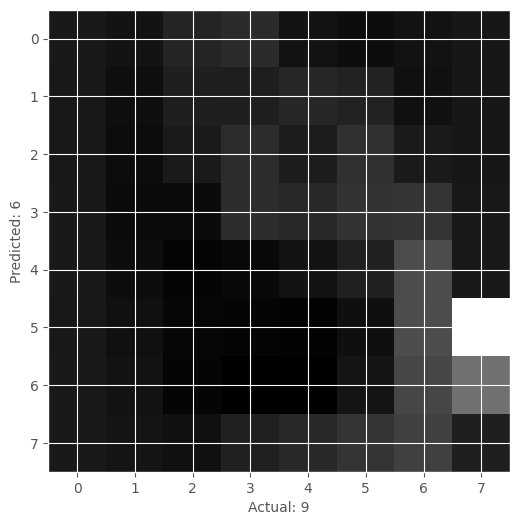

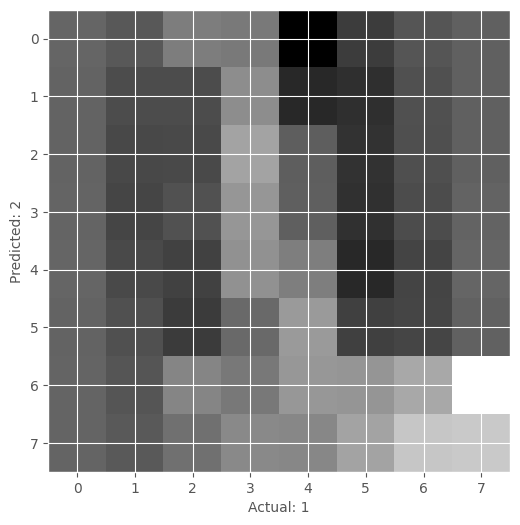

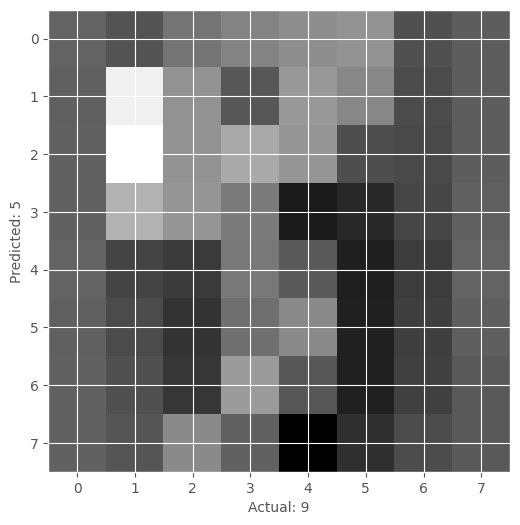

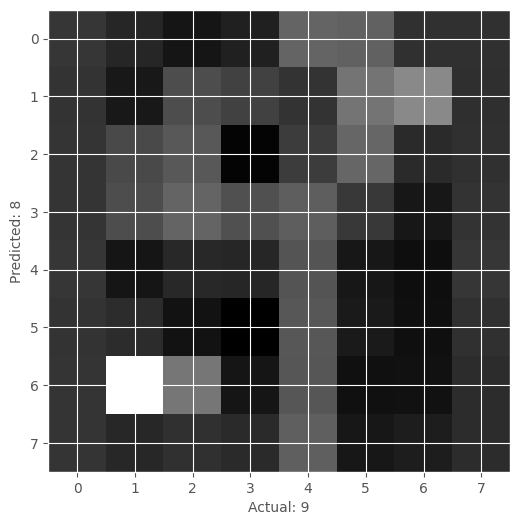

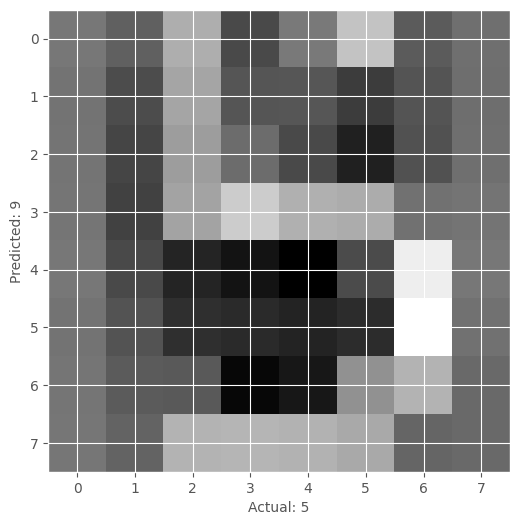

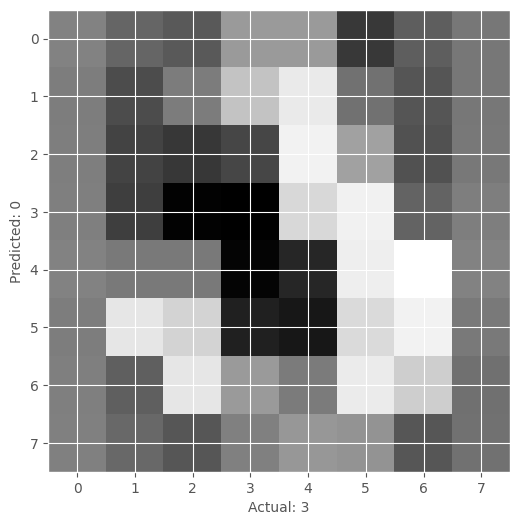

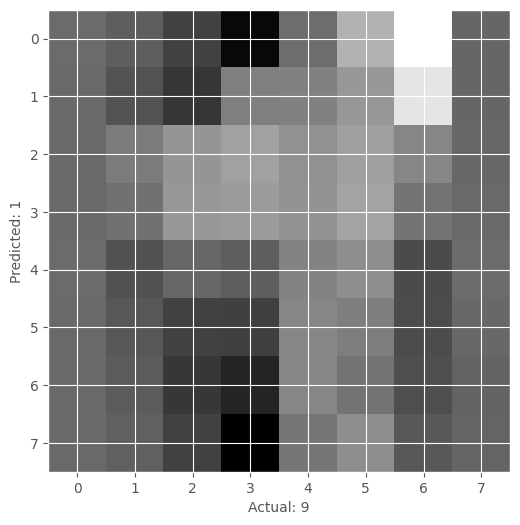

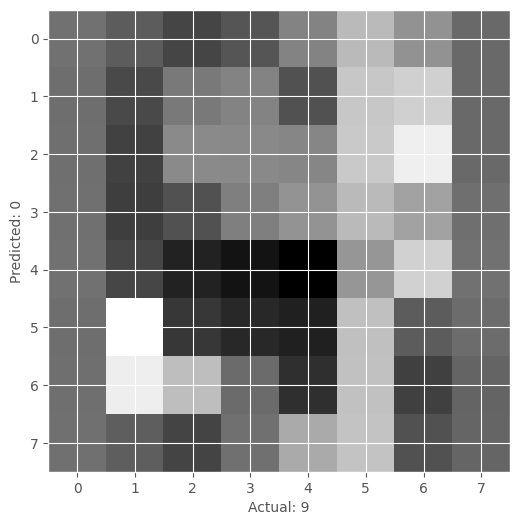

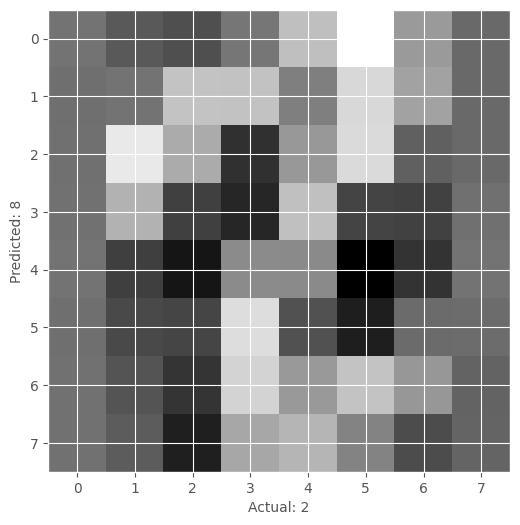

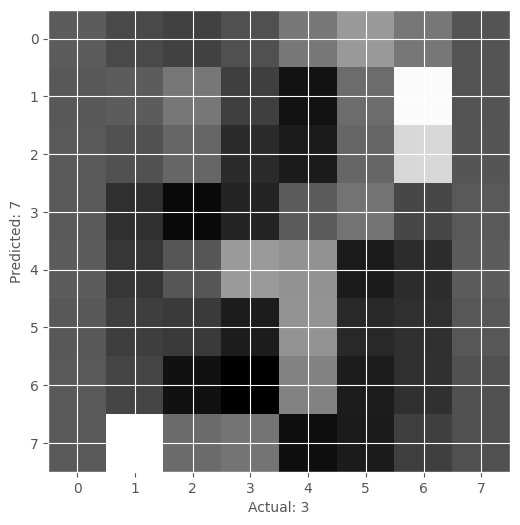

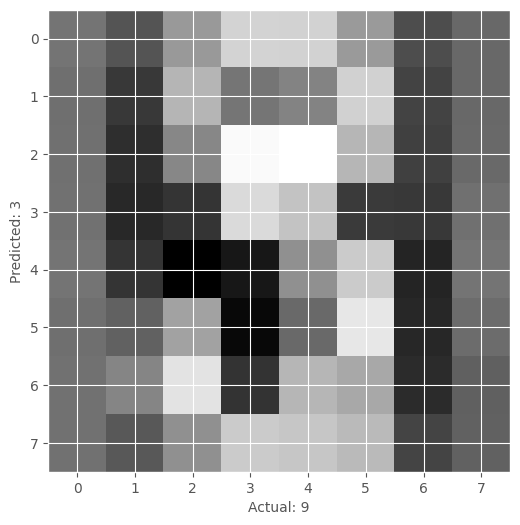

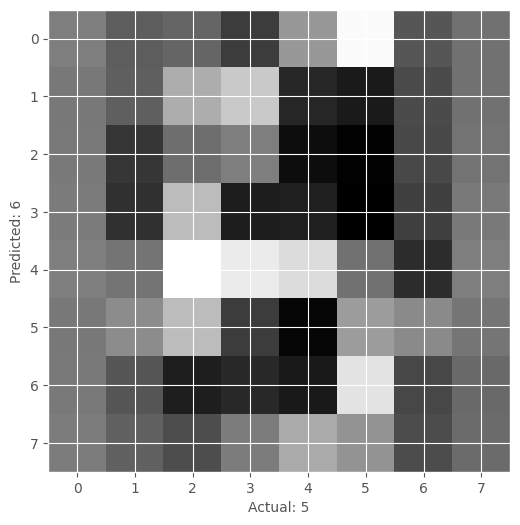

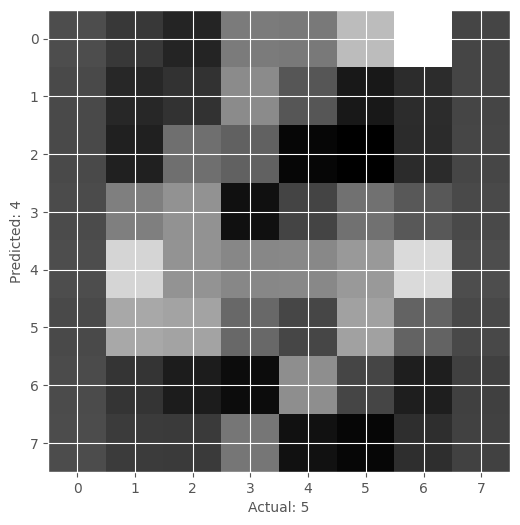

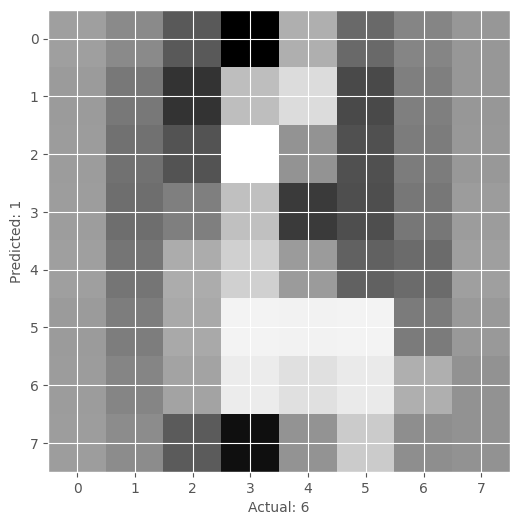

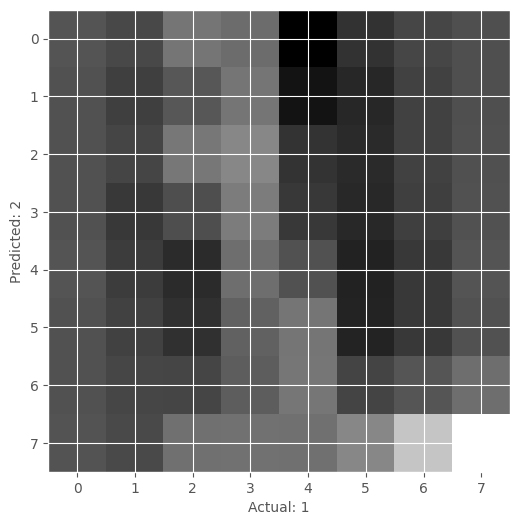

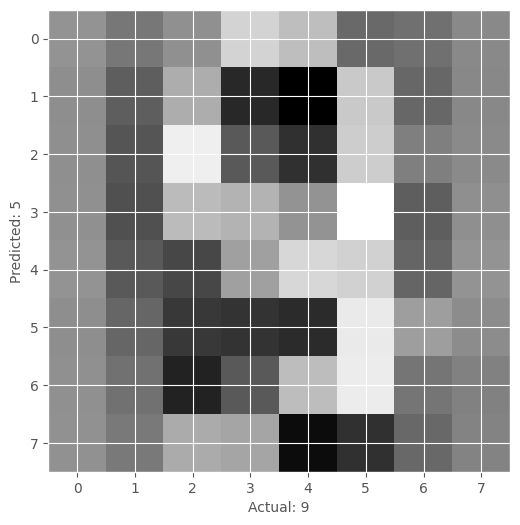

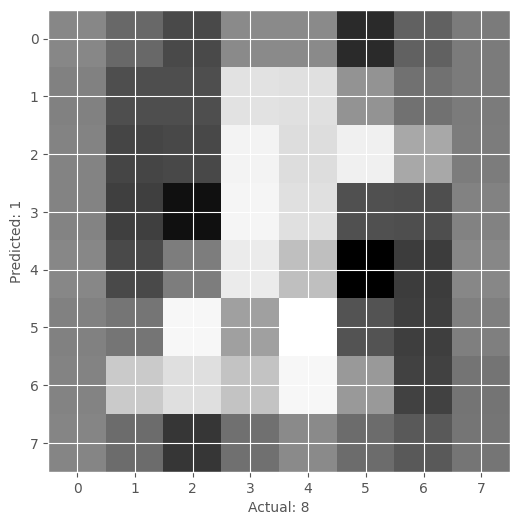

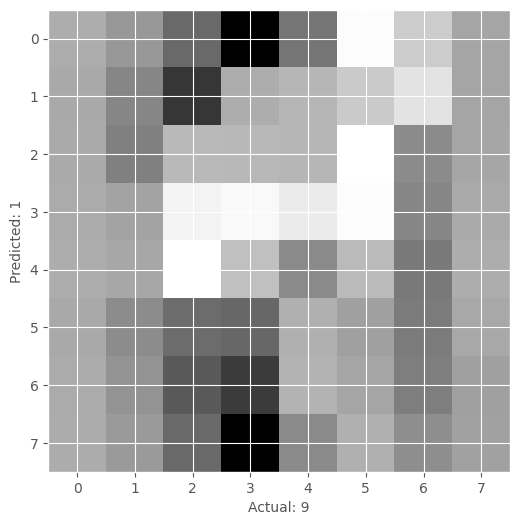

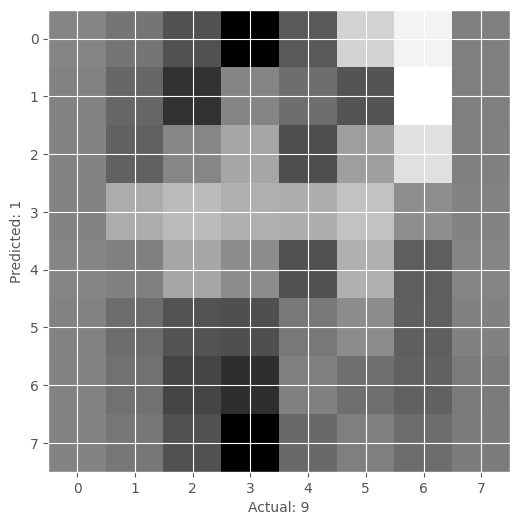

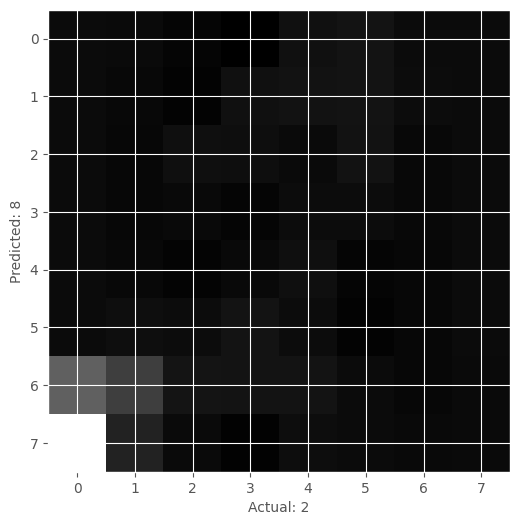

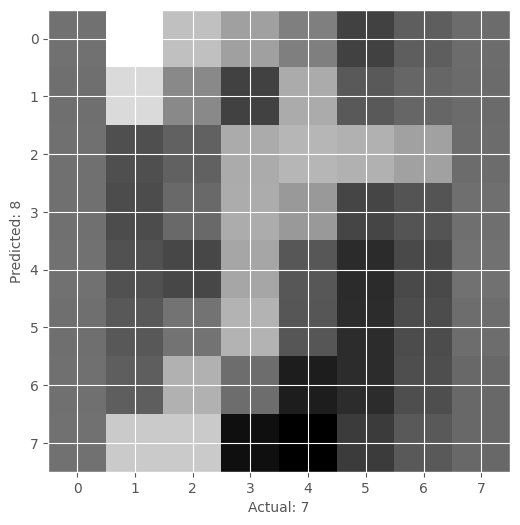

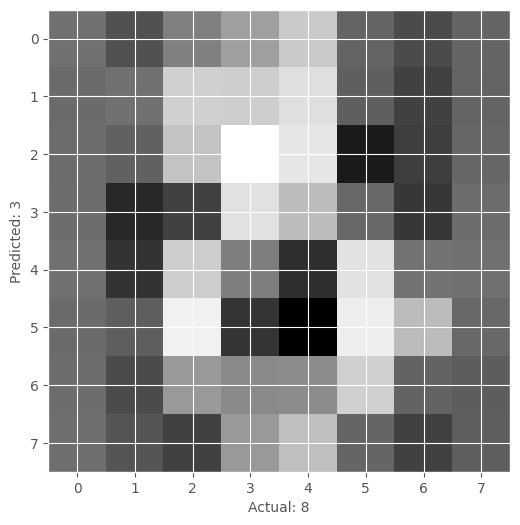

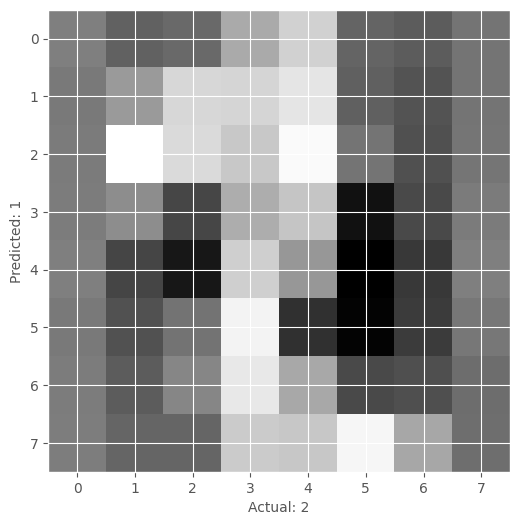

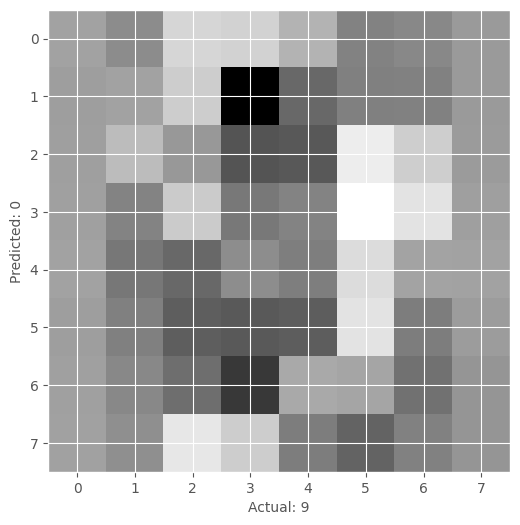

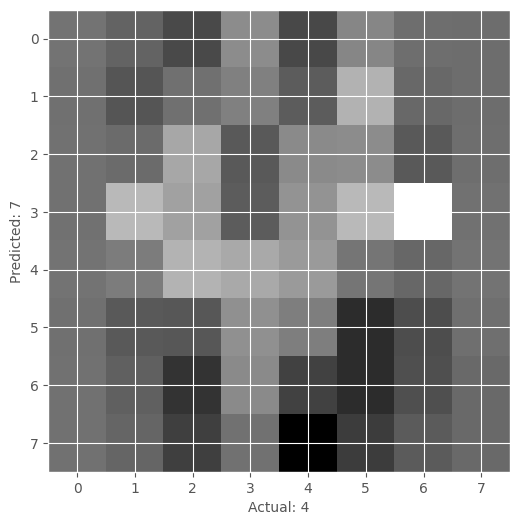

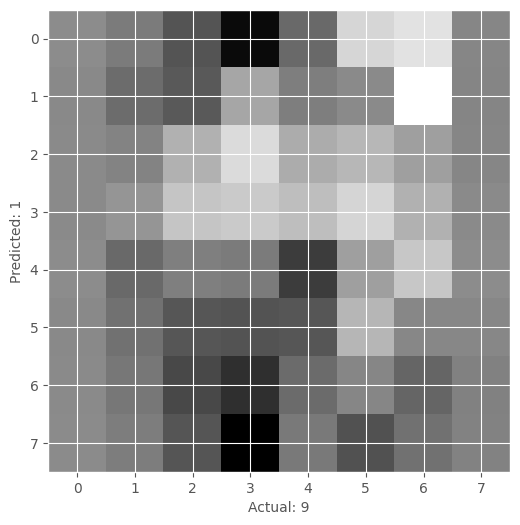

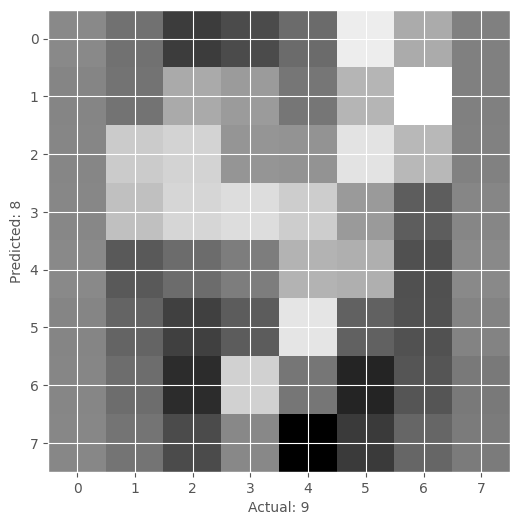

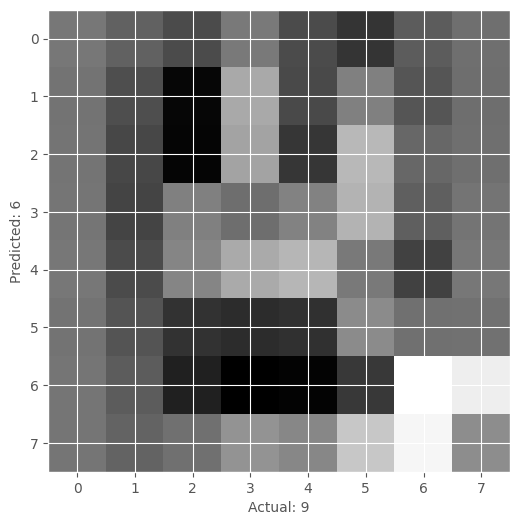

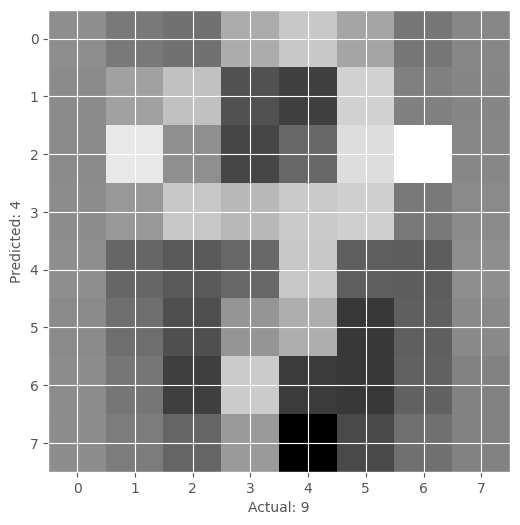

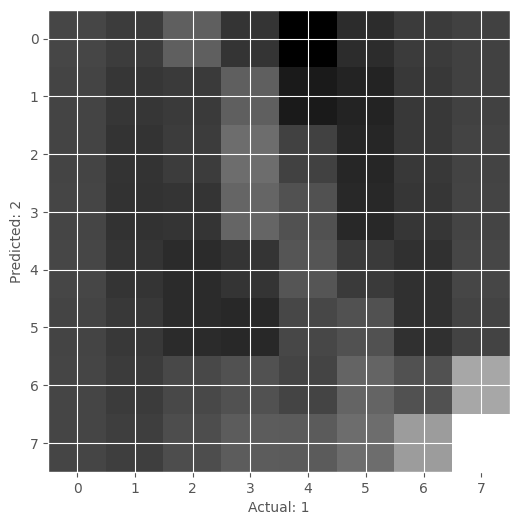

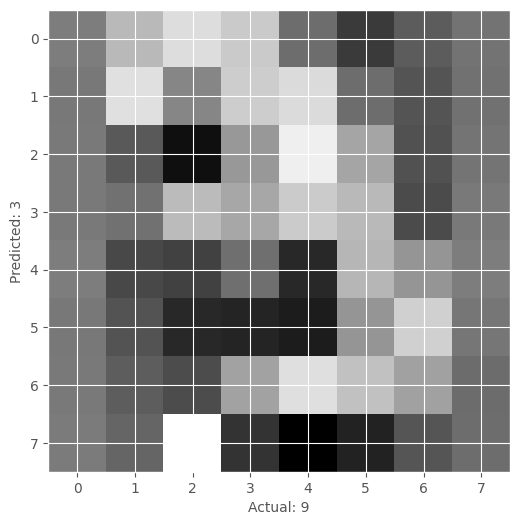

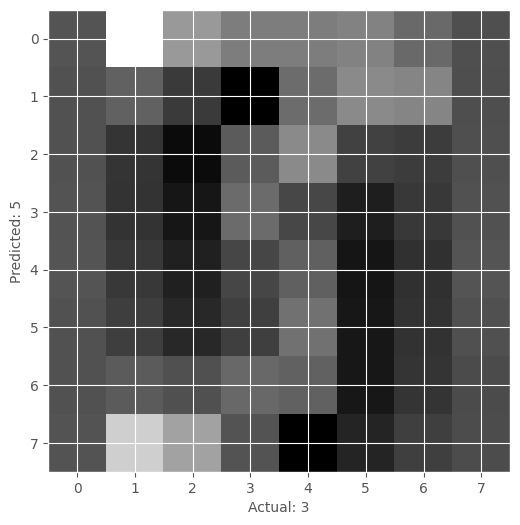

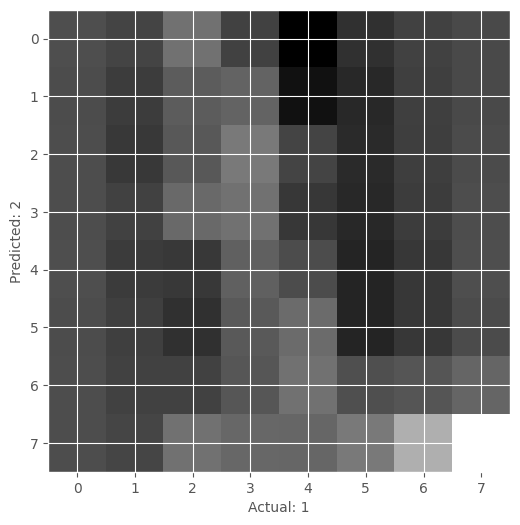

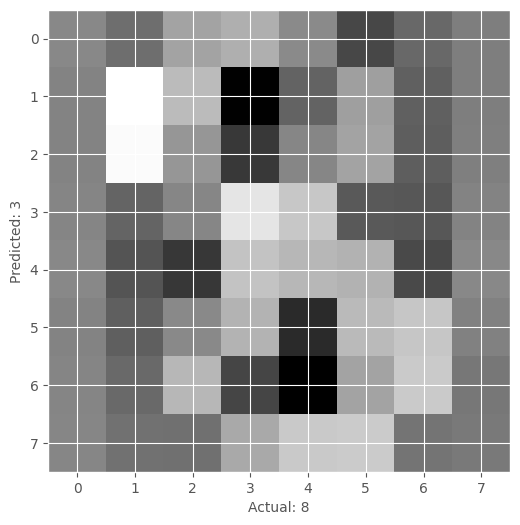

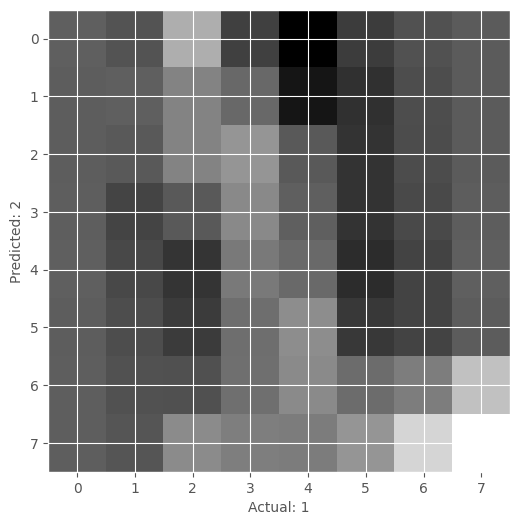

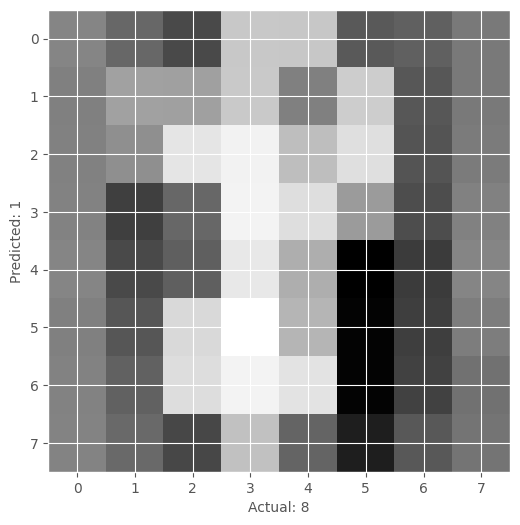

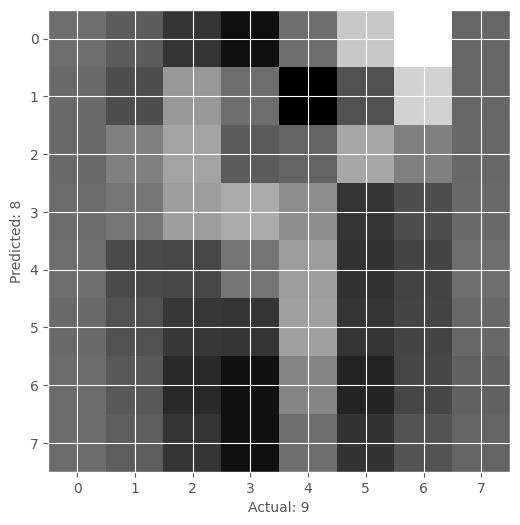

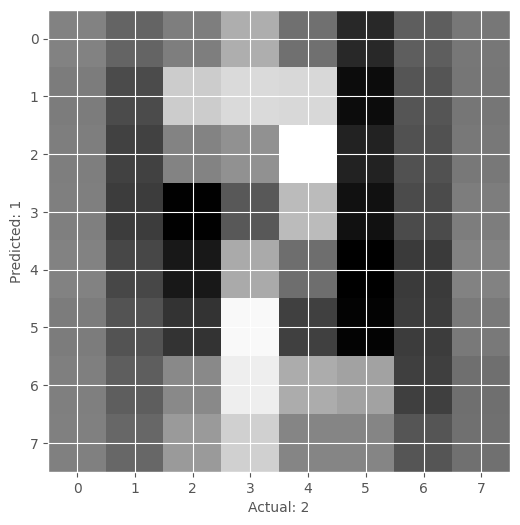

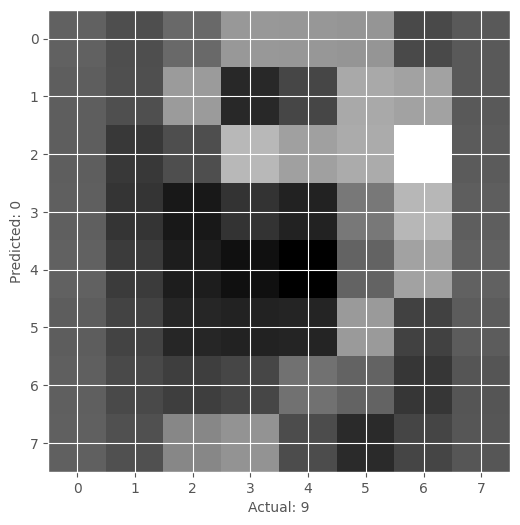

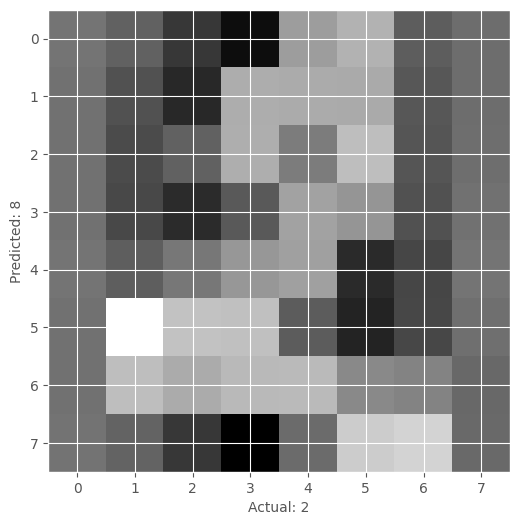

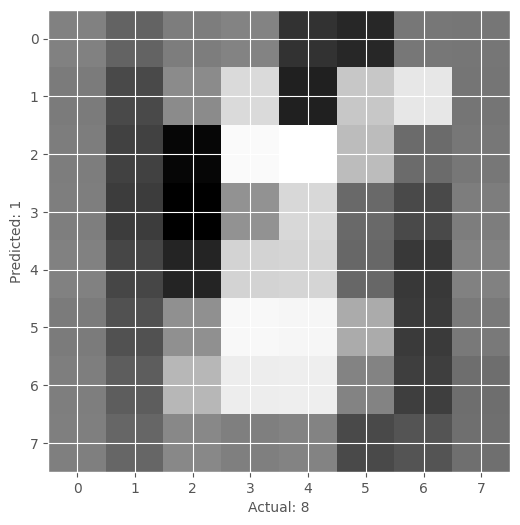

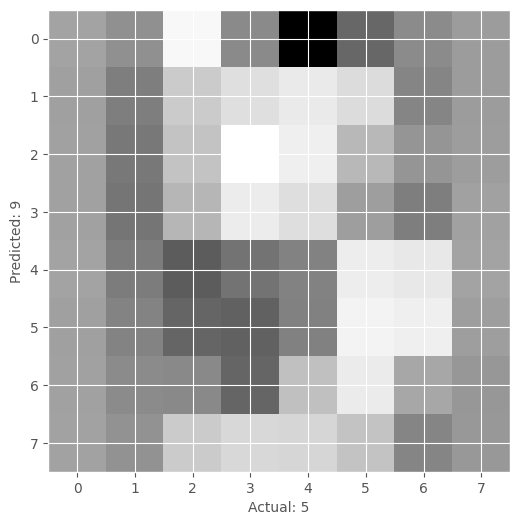

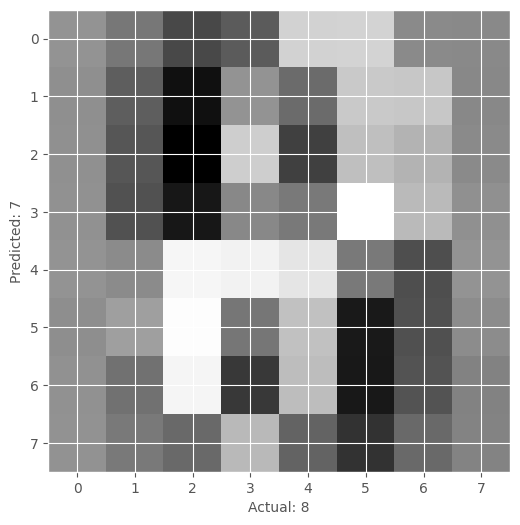

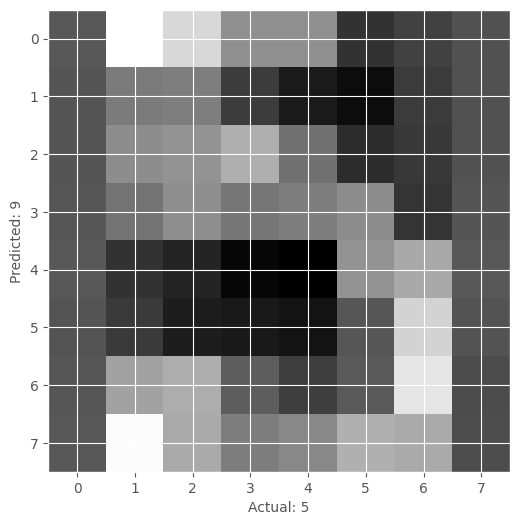

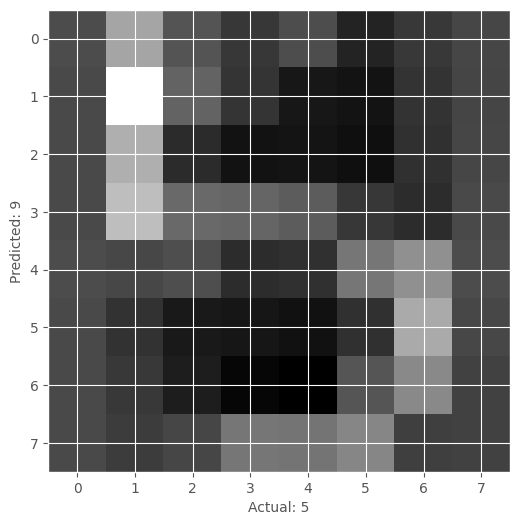

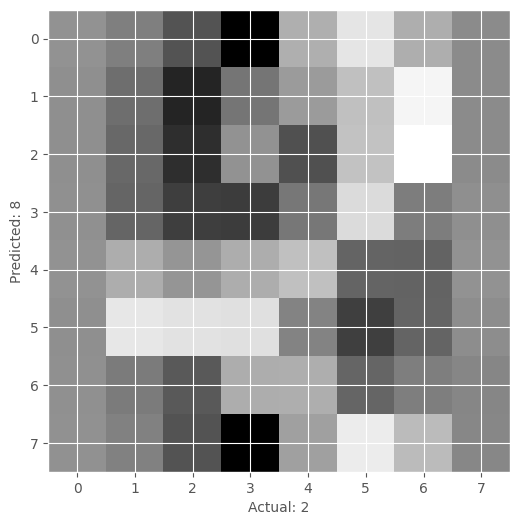

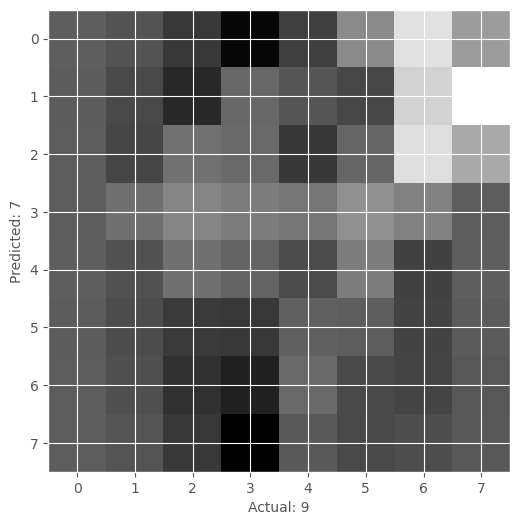

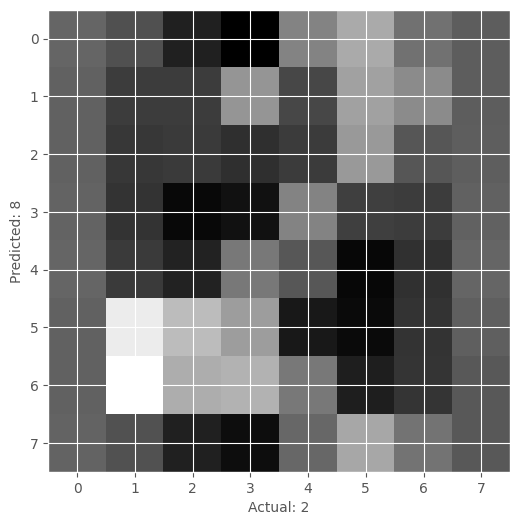

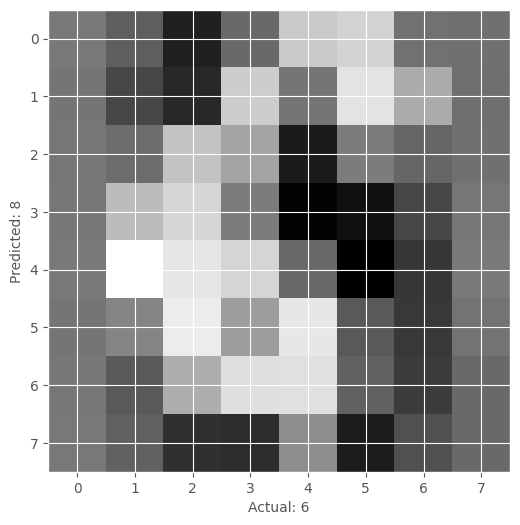

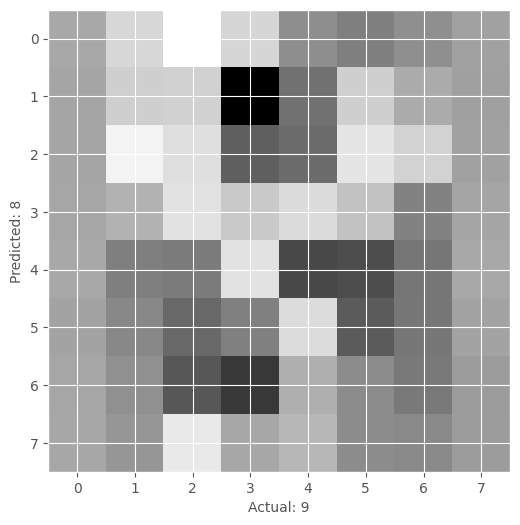

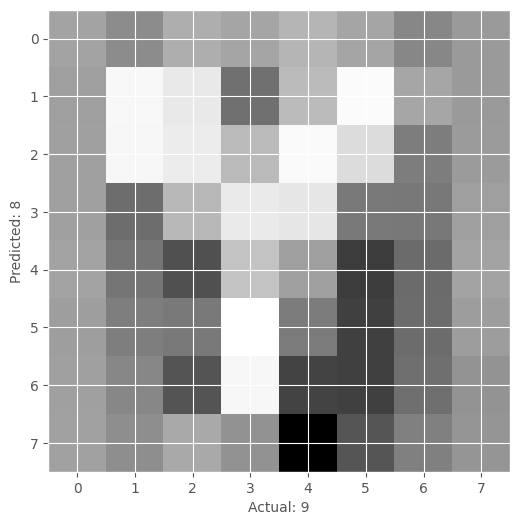

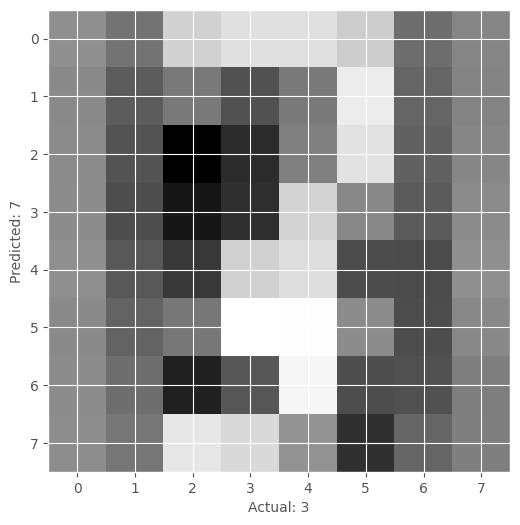

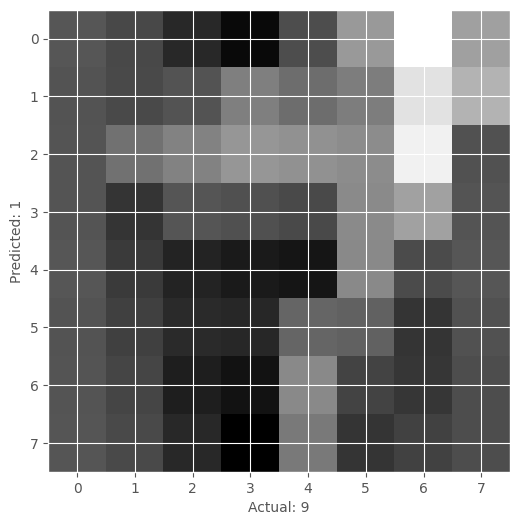

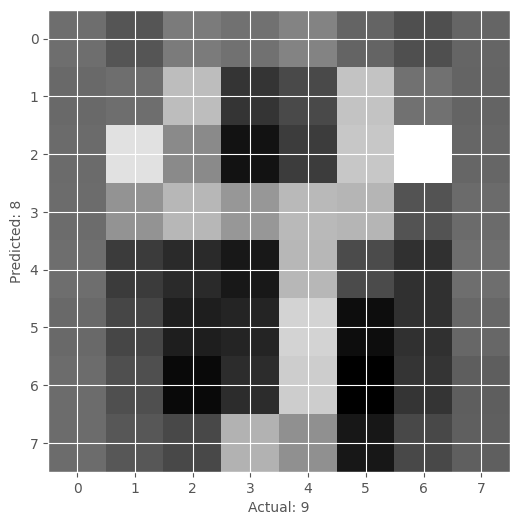

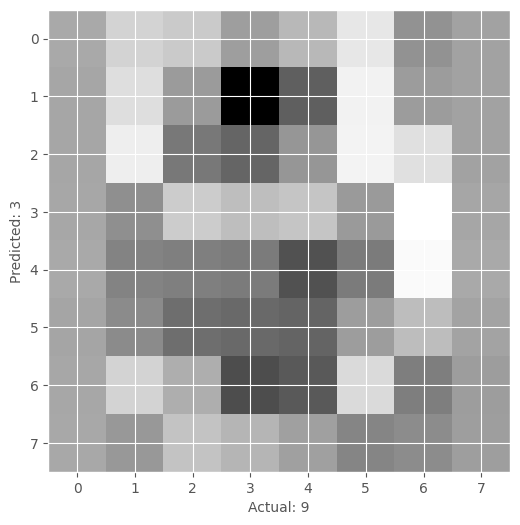

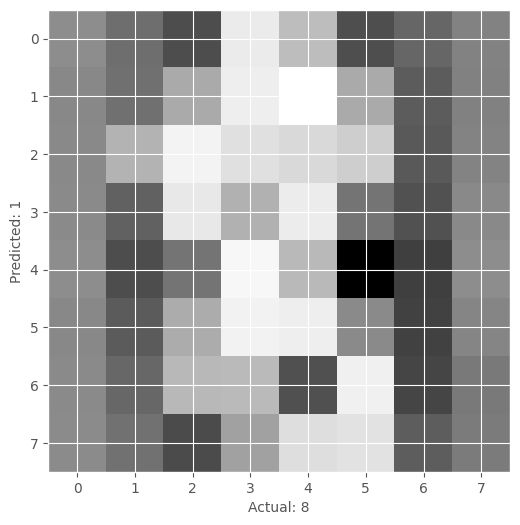

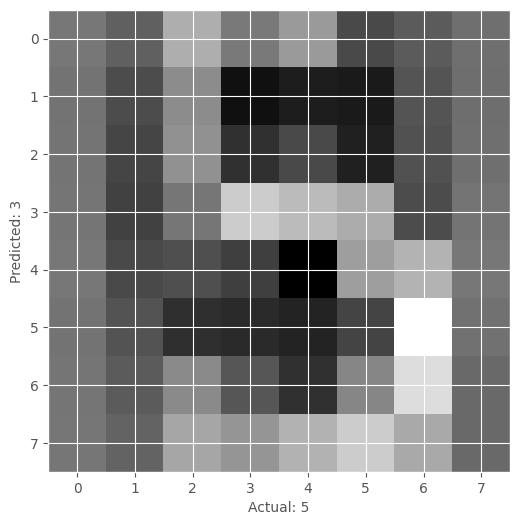

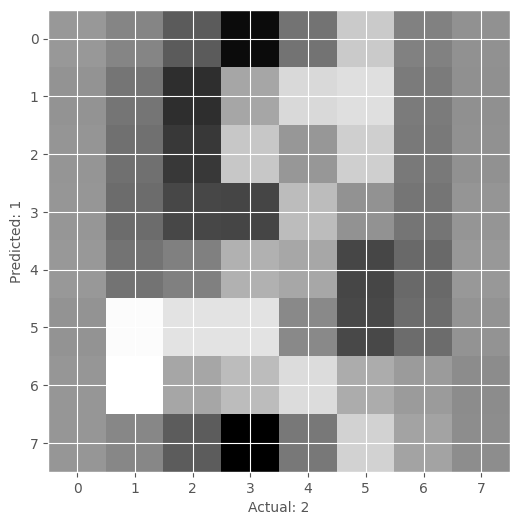

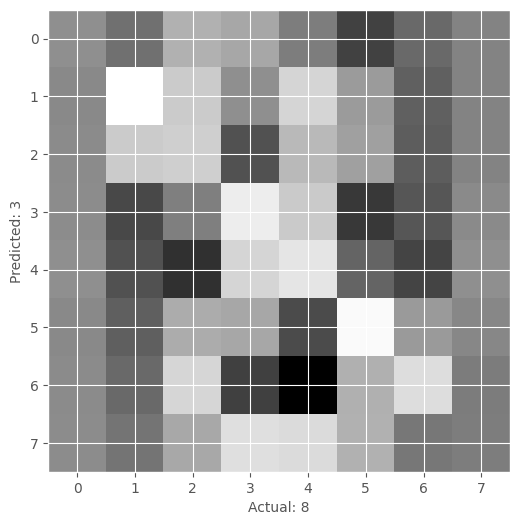

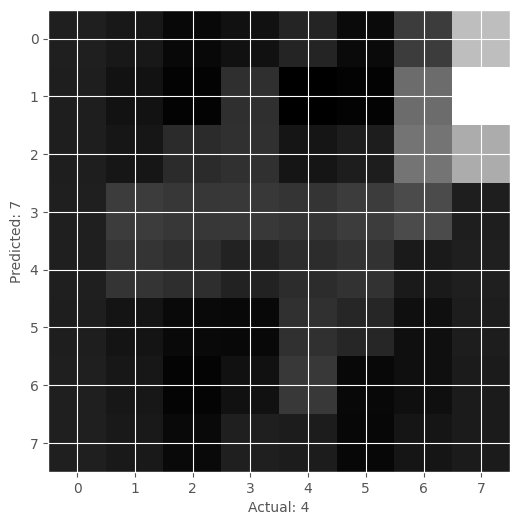

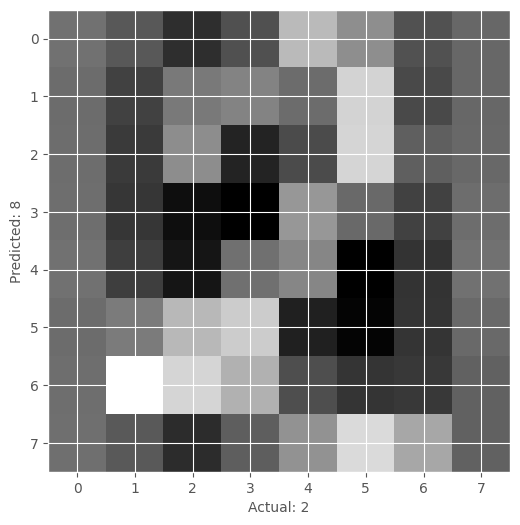

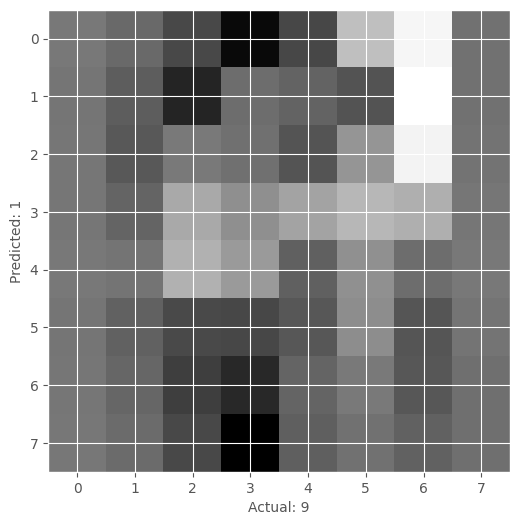

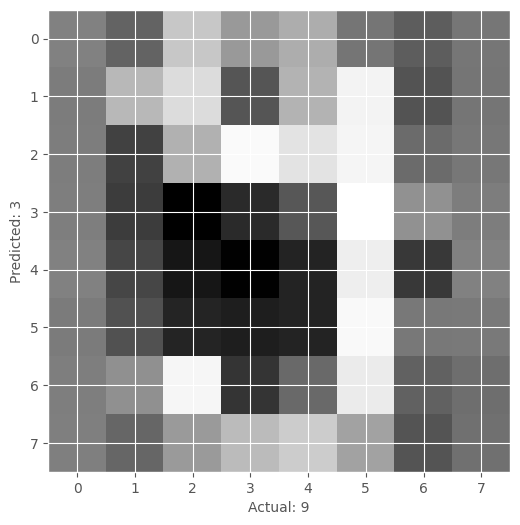

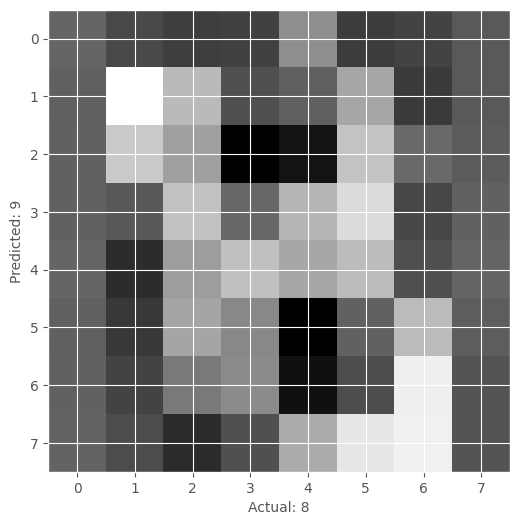

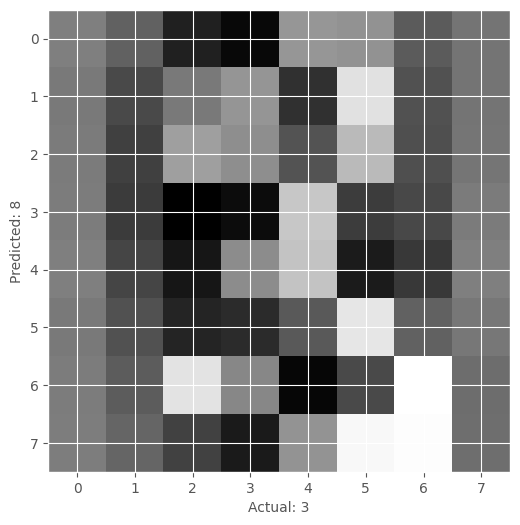

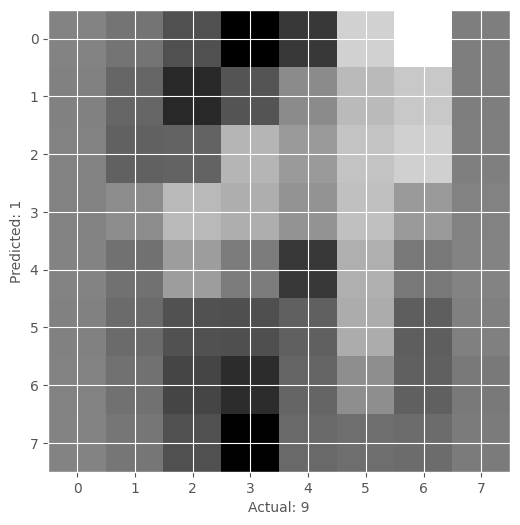

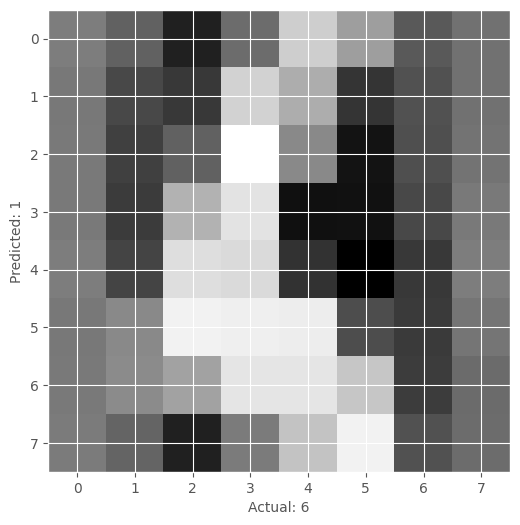

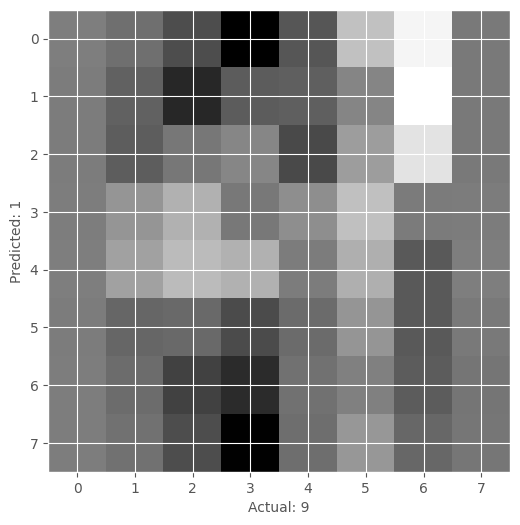

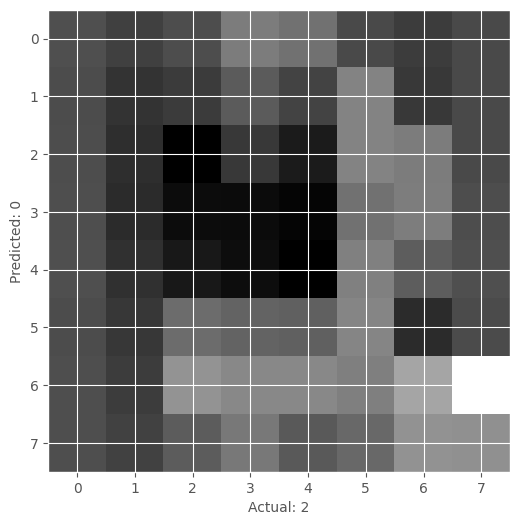

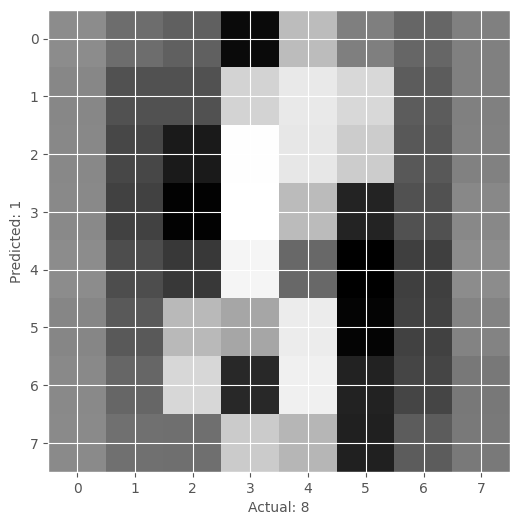

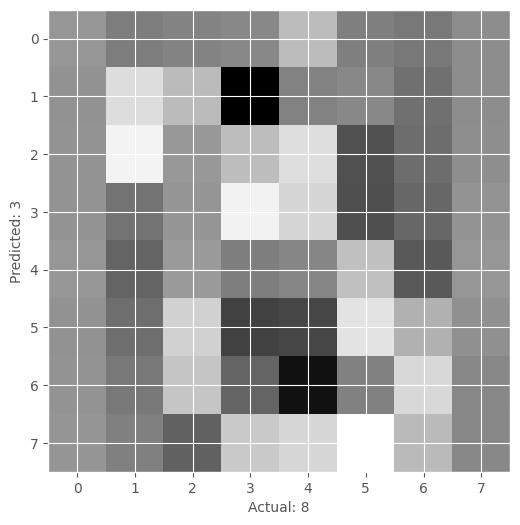

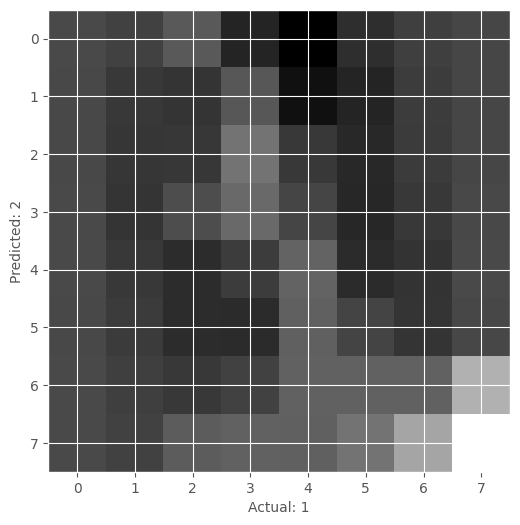

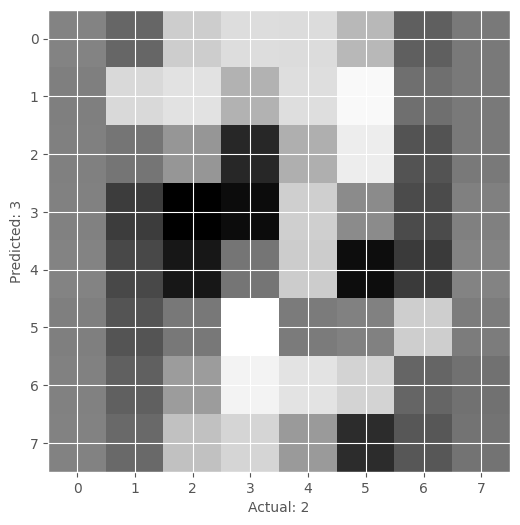

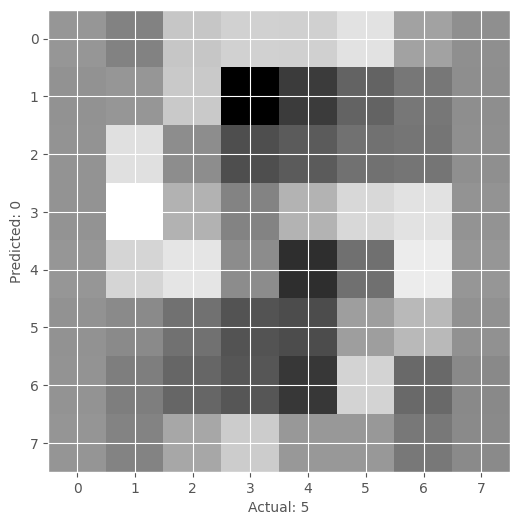

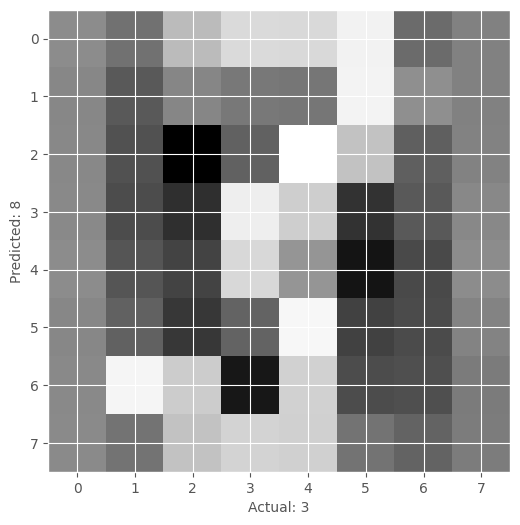

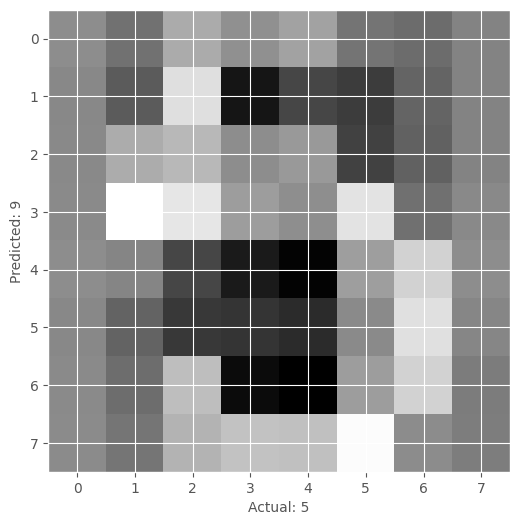

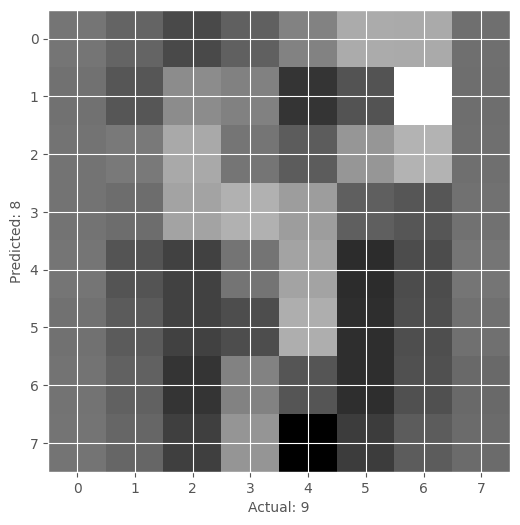

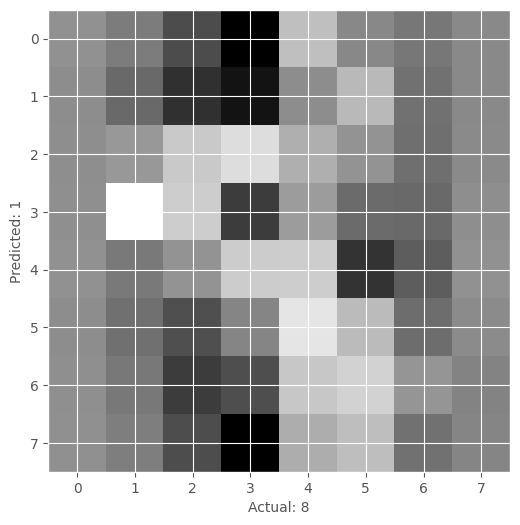

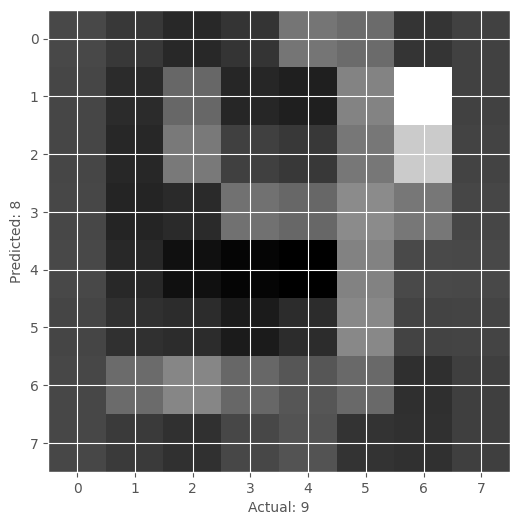

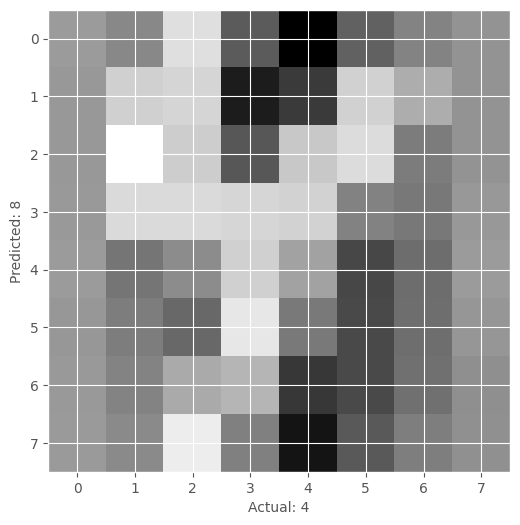

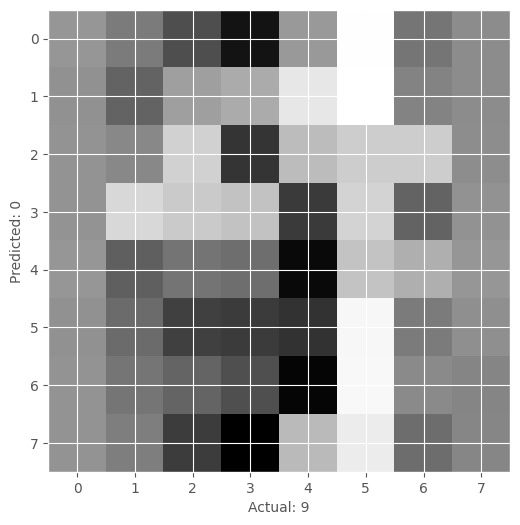

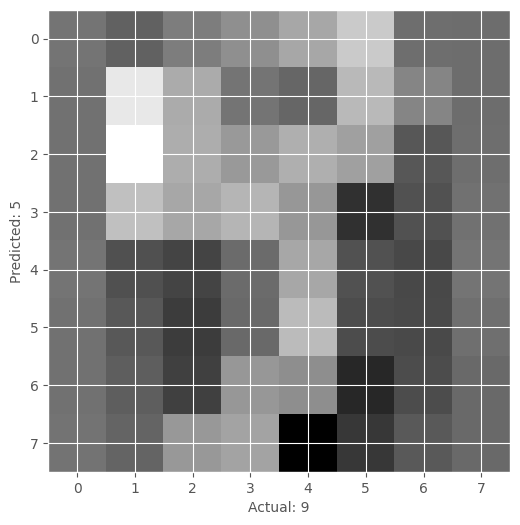

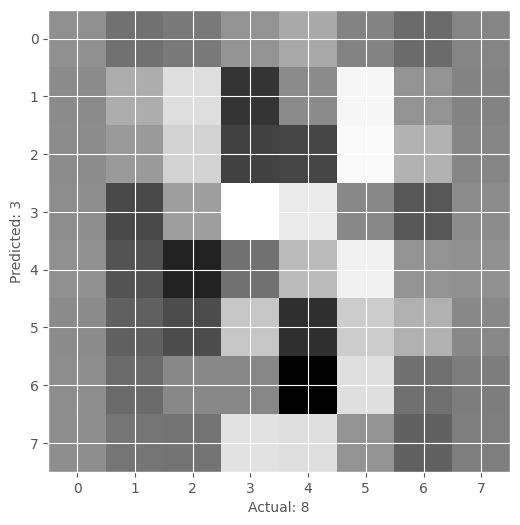

The total number of incorrect digits is: 126


In [63]:
counter = 0

for i in range(knn_y_pred.size):
    if knn_y_pred[i] != knn_y_test[i]:
        plt.gray()
        plt.imshow(np.reshape(knn_x_test[i],(8,8)), cmap='gray')
        knn_pridicted_digit = "Predicted: " + str(knn_y_pred[i])
        knn_actual_digit = "Actual: " + str(knn_y_test[i])
        plt.xlabel(knn_actual_digit, fontsize=10)
        plt.ylabel(knn_pridicted_digit, fontsize=10)
        plt.show()
        counter+= 1
print("The total number of incorrect digits is: " + str(counter))

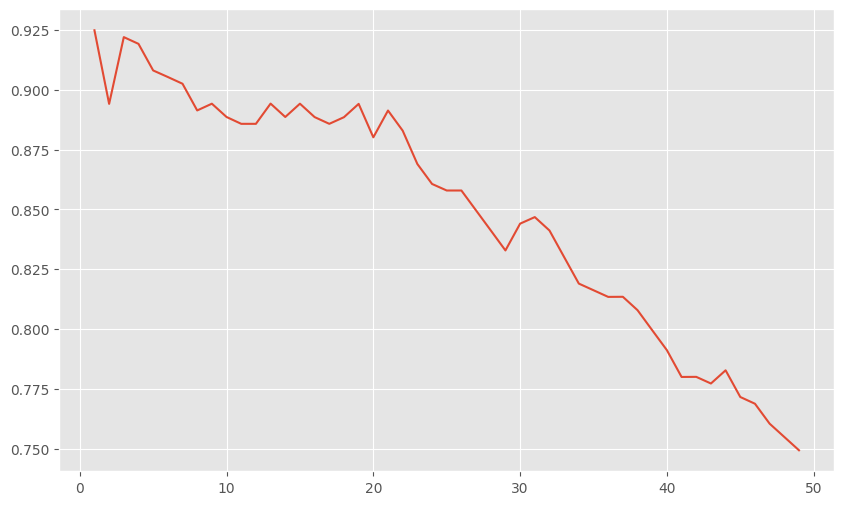

Best K value: 1
Best Cross-Validated Accuracy: 0.9248435054773083


In [79]:
K_values = np.arange(1, 50, 1)
accuracies_knn = np.zeros(K_values.shape[0])
for i,K in enumerate(K_values): 
    knn_model = KNeighborsClassifier(n_neighbors= K)
    scores_knn = cross_val_score(estimator = knn_model, X = knn_x_train, y = knn_y_train, cv=5, scoring='accuracy')    
    accuracies_knn[i]  = scores_knn.mean()
        
plt.plot(K_values,accuracies_knn)
plt.show()
# Find the best K value and its accuracy
best_index_K = np.argmax(accuracies_knn)
best_K = K_values[best_index_K]
best_accuracy_k = accuracies_knn[best_index_K]

print(f'Best K value: {best_K}')
print(f'Best Cross-Validated Accuracy: {best_accuracy_k}')

The best K value is 1 with an accuracy of 92.4%

In [74]:
raw_k_digits = load_digits()
raw_k_x = raw_k_digits.data
raw_k_y = raw_k_digits.target

raw_k_x_train, raw_k_x_test, raw_k_y_train, raw_k_y_test = train_test_split( raw_k_x, raw_k_y, random_state=1, test_size=0.8 )

raw_knn_model = KNeighborsClassifier(n_neighbors=10)
raw_knn_model.fit(raw_k_x_train, raw_k_y_train)

print('Confusion Matrix:')
raw_knn_y_pred = raw_knn_model.predict(raw_k_x_test)
print(metrics.confusion_matrix(y_true = raw_k_y_test, y_pred = raw_knn_y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = raw_k_y_test, y_pred = raw_knn_y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   3 121]]
Accuracy =  0.9388038942976356


The accuracy of raw unscaled digits with KNN is 93.9%.

## Part 2: Online News Dataset

In [76]:
# Import and process data 
df = pd.read_csv('OnlineNewsPopularity.csv')
shares = df[' shares'].to_numpy()

df = df.drop(columns=['url', ' timedelta', ' shares'])

x = df.to_numpy()

y = []

median_share = np.median(shares)

y = np.where(shares > median_share, 1, 0)

# Check to see if the values are reasonable
print("Min shares: " + str(shares.min()))
print("Max shares: " + str(shares.max()))
print("Median: " + str(median_share))

Min shares: 1
Max shares: 843300
Median: 1400.0


### Classification using KNN

In [80]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.8 )

model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[11334  4637]
 [ 9650  6095]]
Accuracy =  0.5495333585571951


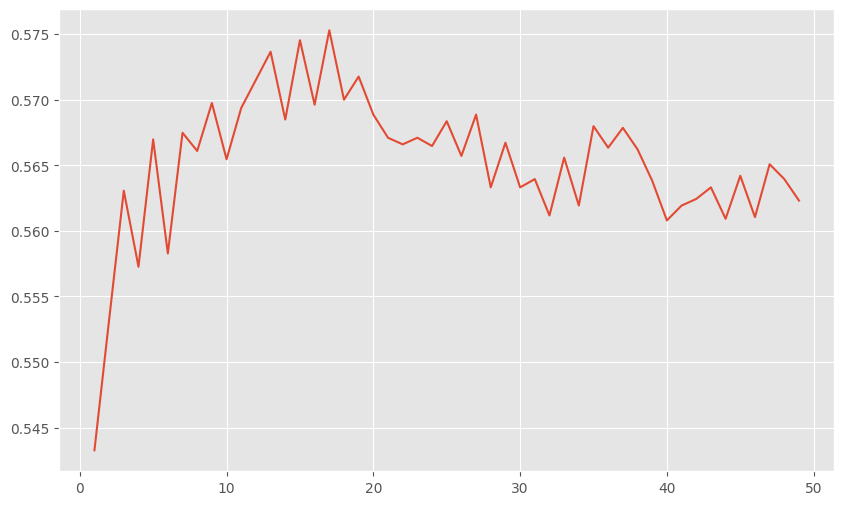

Best K value: 17
Best Cross-Validated Accuracy: 0.5753031454246741


In [81]:
K_values = np.arange(1, 50, 1)
accuracies_knn = np.zeros(K_values.shape[0])
for i,K in enumerate(K_values): 
    knn_model = KNeighborsClassifier(n_neighbors= K)
    scores_knn = cross_val_score(estimator = knn_model, X = x_train, y = y_train, cv=5, scoring='accuracy')    
    accuracies_knn[i]  = scores_knn.mean()
        
plt.plot(K_values,accuracies_knn)
plt.show()
# Find the best K value and its accuracy
best_index_K = np.argmax(accuracies_knn)
best_K = K_values[best_index_K]
best_accuracy_k = accuracies_knn[best_index_K]

print(f'Best K value: {best_K}')
print(f'Best Cross-Validated Accuracy: {best_accuracy_k}')

In [82]:
#running again with the best K value
model = KNeighborsClassifier(n_neighbors=17)
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))


Confusion Matrix:
[[10182  5789]
 [ 8154  7591]]
Accuracy =  0.5603796191196873


The best value for K is 17 based on this data, with the highest accuracy at 0.56 which is not a confident accuracy. This is a marginal improvement from a K of 10, with an accuracy of 54.9%.

### Classification using SVM

In [84]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.8 )

model = svm.SVC(kernel='rbf', C=5)
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[11808  4163]
 [10058  5687]]
Accuracy =  0.5516143271534872


In [88]:
# Randomly sample 5000 articles 
random_articles = np.random.choice(x.shape[0], 5000, replace=False)
random_5000_X = x[random_articles]
random_5000_y = y[random_articles]

In [92]:
C_values = np.linspace(1, 500, 100)
accuracy_scores = np.zeros(C_values.shape[0])

# Evaluate each model with different C values
for i,C in enumerate(C_values):
    model = SVC(kernel='rbf',gamma='scale', C = C)
    # Perform cross-validation and store the mean accuracy
    scores = cross_val_score(estimator = model, X = random_5000_X, y = random_5000_y, cv=5, scoring='accuracy')
    accuracy_scores[i]  = scores.mean()

# Determine the best C value and its corresponding accuracy
best_index = np.argmax(accuracy_scores)
best_C = C_values[best_index]
best_accuracy = accuracy_scores[best_index]

print(f'Best C value: {best_C}')
print(f'Best Cross-Validated Accuracy: {best_accuracy}')

Best C value: 500.0
Best Cross-Validated Accuracy: 0.5738


The best value for C was 500. This raised the accuracy 2 percentage points from 55% to 57%.

### Classification using decision trees

training accuracy=  0.6265174207788113
Accuracy on test data=  0.6323622146550637


[Text(0.5, 0.875, 'x[25] <= 2823.333\ngini = 0.5\nsamples = 31715\nvalue = [16086, 15629]'),
 Text(0.25, 0.625, 'x[15] <= 0.5\ngini = 0.478\nsamples = 15141\nvalue = [9162, 5979]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 0.5\ngini = 0.459\nsamples = 11683\nvalue = [7515.0, 4168.0]'),
 Text(0.0625, 0.125, 'gini = 0.449\nsamples = 11077\nvalue = [7310.0, 3767.0]'),
 Text(0.1875, 0.125, 'gini = 0.448\nsamples = 606\nvalue = [205, 401]'),
 Text(0.375, 0.375, 'x[36] <= 0.5\ngini = 0.499\nsamples = 3458\nvalue = [1647, 1811]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 3078\nvalue = [1551, 1527]'),
 Text(0.4375, 0.125, 'gini = 0.378\nsamples = 380\nvalue = [96, 284]'),
 Text(0.75, 0.625, 'x[12] <= 0.5\ngini = 0.486\nsamples = 16574\nvalue = [6924, 9650]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[26] <= 1450.0\ngini = 0.469\nsamples = 13245\nvalue = [4984, 8261]'),
 Text(0.5625, 0.125, 'gini = 0.493\nsamples = 6171\nvalue = [2733, 3438]'),
 Text(0.6875, 0.

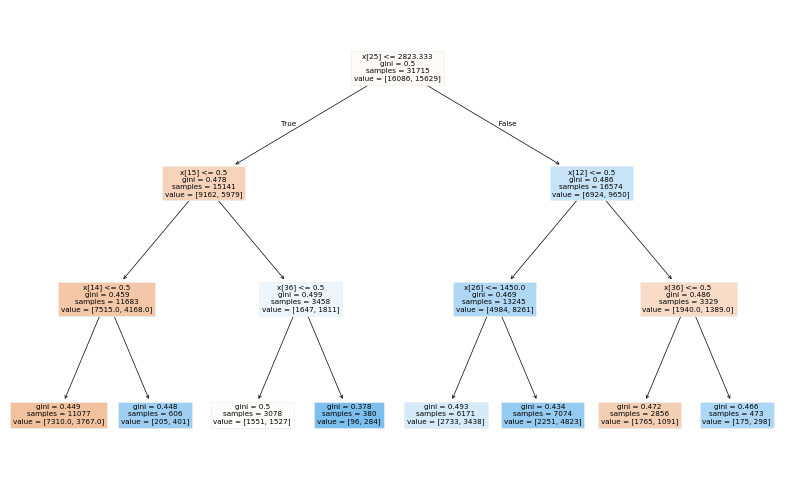

In [102]:
XTrain_tree, XTest_tree, yTrain_tree, yTest_tree = train_test_split(x, y, random_state=1, test_size=0.2)
decisionTree = tree.DecisionTreeClassifier(max_depth=3)

decisionTree = decisionTree.fit(XTrain_tree, yTrain_tree)


y_pred_train = decisionTree.predict(XTrain_tree)
training_accuracy = metrics.accuracy_score(y_true = yTrain_tree, y_pred = y_pred_train)
print('training accuracy= ', training_accuracy)

y_pred_tree = decisionTree.predict(XTest_tree)
test_accuracy = metrics.accuracy_score(y_true = yTest_tree, y_pred = y_pred_tree)
print('Accuracy on test data= ', test_accuracy )
tree.plot_tree(decisionTree, filled=True)

In [98]:
#Find the best depth of tree
depths = np.arange(2, 20, 1)
depth_Accuracies = np.zeros(depths.shape[0])
for i,depth in enumerate(depths):

    decisionTree = tree.DecisionTreeClassifier(max_depth=depth)

    decisionTree = decisionTree.fit(XTrain_tree, yTrain_tree)

    scores = cross_val_score(estimator = decisionTree, X = x, y = y, cv=5, scoring='accuracy')    
    depth_Accuracies[i]  = scores.mean()


print(f'Best depth value: {depths[depth_Accuracies.argmax()]}')
print(f'Best Cross-Validated Accuracy: {depth_Accuracies.max()}')

Best depth value: 6
Best Cross-Validated Accuracy: 0.6174715458422052


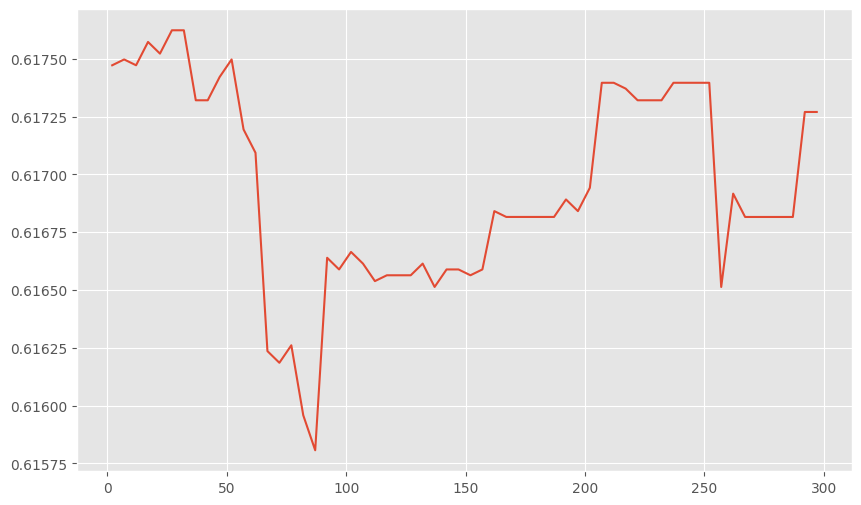

Best sample split: 27
Best Cross-Validated Accuracy: 0.6176228890128447


In [101]:
# Best depth was 6, now find best sample split 
min_samples = np.arange(2, 300, 5)
sample_Accuracies = np.zeros(min_samples.shape[0])
for i,sample in enumerate(min_samples):

    decisionTree = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=sample)

    decisionTree = decisionTree.fit(XTrain_tree, yTrain_tree)

    scores = cross_val_score(estimator = decisionTree, X = x, y = y, cv=5, scoring='accuracy')    
    sample_Accuracies[i]  = scores.mean()

print(f'Best sample split: {min_samples[sample_Accuracies.argmax()]}')
print(f'Best Cross-Validated Accuracy: {sample_Accuracies.max()}')


The optimal depth for this decision tree is 6, which yields an accuracy score of approximately 62%. Although the best minimum sample split is identified as 27, the impact of varying this parameter is minimal, resulting in changes of less than one percentage point. Therefore, the tree depth plays a significantly more influential role in determining model performance than the minimum sample split. When combining these settings—tree depth of 6 and a minimum sample split of 27—the model achieves an accuracy of about 62%

### Describe your findings
- **Which method (k-NN, SVM, Decision Tree) worked best?**
The overall results indicate that while none of the models deliver highly confident predictions (all under 62% accuracy), the Decision Tree model is slightly more reliable
- **How did different parameters influence the accuracy?**
    - Decision Tree: depth significantly affected performance, with changes in minimum sample split having a negligible impact. This indicates that the complexity of the model (as controlled by depth) is more critical to accuracy than how many samples are used to make a split decision.
    - SVM: increasing C, which reduces the regularization strength, slightly improved the model’s performance, suggesting that the dataset might benefit from a model that fits more closely to the training data.
    - KNN: increasing K improved accuracy, but only marginally. This suggests a limit to how well KNN can model this dataset, possibly due to overlapping classes or noise.

- **Which model is easiest to interpret?**
I think decision trees are the easiest to interpret because they can be visualized as a set of decision rules (if-then statements). This makes it straightforward to understand how decisions are made.

- **How would you interpret your results?**
    - The features that predict the number of shares the best are num_keywords, data_channel_is_entertainment, data_channel_is_tech, and is_weekend. But these predictors are not confident based off our highest accuracy. 
    - The limited performance across all models suggests that the dataset may be inherently challenging, possibly due to overlapping feature distributions, high variability, or insufficient features capturing the underlying patterns necessary for higher accuracies. The small improvements with parameter tuning also indicate a potential ceiling effect in model capabilities with the current features.
    - Given these insights, further investigation into feature engineering, ensemble methods, or trying more complex models like Random Forests or boosting methods could be beneficial.


